In [11]:
import selenium
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium import webdriver
import os
import urllib
import time

# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars

In [2]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [3]:
url = "https://www.amazon.in/"
driver.get(url)

In [4]:
val = input("Enter your value: ")
print(val)

Enter your value: guitar
guitar


In [5]:
val

'guitar'

In [6]:
search_keyword = driver.find_element_by_id('twotabsearchtextbox') 
search_keyword

<selenium.webdriver.remote.webelement.WebElement (session="e675c8b8b6944e7bc34809d59b7299b8", element="9931bb4e-9dcd-44d6-ac24-3155aed872df")>

In [7]:
search_keyword.send_keys(val)

In [8]:
search_btn = driver.find_element_by_xpath("//div[@class='nav-search-submit nav-sprite']")
search_btn.click()

# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [9]:
page_urls=[]
url = driver.find_elements_by_xpath('//li[@class="a-selected" or @class="a-normal"]//a')

for i in url:
    page_urls.append(i.get_attribute('href'))
page_urls

['https://www.amazon.in/s?k=guitar&qid=1625198733&ref=sr_pg_1',
 'https://www.amazon.in/s?k=guitar&page=2&qid=1625198733&ref=sr_pg_2',
 'https://www.amazon.in/s?k=guitar&page=3&qid=1625198733&ref=sr_pg_3']

In [13]:
product_title=[]
brand=[]
rating=[]
number_of_rating=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]
other_details=[]
products_urlsss=[]


In [14]:

for urls in page_urls:
    driver.get(urls)
    product_ur=[]
    product_url=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in product_url:
        product_ur.append(i.get_attribute('href'))
    for j in product_ur:
        driver.get(j)
        try:
            product_title_tags=driver.find_element_by_xpath("//h1[@class='a-size-large a-spacing-none']")
            product_title.append(product_title_tags.text)
            
        except NoSuchElementException:                                                            
            product_title.append("-")

            
            
        try:
            brand_tags=driver.find_element_by_xpath("//table[@class='a-normal a-spacing-micro']//tbody//tr//td[@class='a-span9']")
            brand.append(brand_tags.text)
            
        except NoSuchElementException:                                                            
            brand.append("-")  
            
            
            
        try:
            rating_tags=driver.find_element_by_xpath("//span[@data-hook='rating-out-of-text']")
            rating.append(rating_tags.text)
            
        except NoSuchElementException:                                                            
            rating.append("-")     
            
            
        try:
            number_of_rating_tags=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']")
            number_of_rating.append(number_of_rating_tags.text)
            
        except NoSuchElementException:                                                            
            number_of_rating.append("-")
            
            
            
        try:
            price_tags=driver.find_element_by_xpath("//span[@id='priceblock_ourprice']")
            price.append(price_tags.text)
            
        except NoSuchElementException:                                                            
            price.append("-")   
            
            
        try:
            return_exchange_tags=driver.find_element_by_xpath("//div[@data-name='RETURNS_POLICY']")
            return_exchange.append(return_exchange_tags.text)
        
        except NoSuchElementException:                                                            
            return_exchange.append("-")             

            
            
            
        try:
            expected_delivery_tags=driver.find_element_by_xpath("//div[@id='ddmDeliveryMessage']//b")
            expected_delivery.append(expected_delivery_tags.text)
            
        except NoSuchElementException:                                                            
            expected_delivery.append("-") 
            
            
        try:
            availability_tags=driver.find_element_by_xpath("//div[@id='availability']")
            availability.append(availability_tags.text)
            
        except NoSuchElementException:                                                            
            availability.append("-")
            
            
            
        try:
            other_details_tags=driver.find_element_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']")
            other_details.append(other_details_tags.text)
            
        except NoSuchElementException:                                                            
            other_details.append("-")
            
            
            

        products_urlsss.append(j)
            

            
            
        

In [28]:
len(product_title)

184

In [29]:
len(brand)

184

In [30]:
len(rating)

184

In [31]:
len(number_of_rating)

184

In [32]:
len(price)

184

In [33]:
len(return_exchange)

184

In [34]:
len(expected_delivery)

184

In [35]:
len(availability)

184

In [36]:
len(other_details)

184

In [37]:
len(products_urlsss)

184

In [38]:
product_title

['Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 Inch Cutaway, Right Handed, White with Bag, Strings, Picks and Strap',
 'Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway with Bag (TBS Transparent Blue Sunburst)',
 'Juarez Acoustic Guitar, 38 Inch Cutaway, 38CMB with Bag, Strings, Pick and Strap, Matte Black',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway with Bag (TBS Transparent Blue Sunburst)',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'JUAREZ JRZ38C Right Handed Acoustic Guitar (Sunburst, 6 Strings)',
 'Vault EA40 Premium 41 inch Spruce-Top Cutaway Acoustic Guitar',
 'JUAREZ JRZ38C Right Handed 

In [39]:
brand

['Juârez',
 'Juârez',
 'JUAREZ',
 'JUAREZ',
 'Juârez',
 'JUAREZ',
 'Intern',
 'Juârez',
 'Intern',
 'JUAREZ',
 'VAULT',
 'JUAREZ',
 'JUAREZ',
 'Juârez',
 'Kadence',
 'Giuson',
 'Kadence',
 'JUAREZ',
 'Juârez',
 'Generic',
 'HOVNER',
 '-',
 'Intern',
 'JUAREZ',
 'JUAREZ',
 'Juârez',
 'JUAREZ',
 'JUAREZ',
 'Kadence',
 'Kordz',
 'Kadence',
 'YAMAHA',
 'BEBLY',
 'Intern',
 'MUSTANG',
 'MUSTANG',
 'Luximal',
 '-',
 'HYMET',
 'JUAREZ',
 'Kadence',
 'SOUVENIR',
 'Kadence',
 'Henrix',
 'Kadence',
 'Juârez',
 'PERLMAN',
 'JUAREZ',
 'JUAREZ',
 'JUAREZ',
 'ALOK',
 'SAAN Life Science',
 'Intern',
 'BRAMHANI ENTERPRISE',
 'Intern',
 'Henrix',
 '-',
 'JUAREZ',
 'JUAREZ',
 'Ibanez',
 'Kadence',
 'SG Musical',
 'JUAREZ',
 'Kadence',
 'Gator',
 '-',
 'JUAREZ',
 '-',
 'Kadence',
 'Intern',
 'DEVICE OF URBAN INFOTECH',
 'JUAREZ',
 'SAJANI',
 'Intern',
 'CARTIFY',
 'YAMAHA',
 'Crizer',
 'Blueberry',
 'JUAREZ',
 'SBU',
 'DEVICE OF URBAN INFOTECH',
 'JUAREZ',
 'JUAREZ',
 '-',
 'JUAREZ',
 'Kadence',
 'JUAREZ

In [40]:
rating

['3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.9 out of 5',
 '2.9 out of 5',
 '4 out of 5',
 '3.8 out of 5',
 '3.9 out of 5',
 '4.1 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '4 out of 5',
 '4.4 out of 5',
 '-',
 '3.7 out of 5',
 '4.4 out of 5',
 '3.5 out of 5',
 '2.9 out of 5',
 '4 out of 5',
 '2 out of 5',
 '3.9 out of 5',
 '4.2 out of 5',
 '-',
 '3.8 out of 5',
 '3.8 out of 5',
 '3.9 out of 5',
 '4.1 out of 5',
 '-',
 '3.8 out of 5',
 '3.5 out of 5',
 '2.4 out of 5',
 '-',
 '3.8 out of 5',
 '3.9 out of 5',
 '2 out of 5',
 '3.7 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '3.8 out of 5',
 '4.3 out of 5',
 '3.9 out of 5',
 '-',
 '5 out of 5',
 '3.9 out of 5

In [41]:
number_of_rating

['10,664 ratings',
 '353 ratings',
 '3,642 ratings',
 '184 ratings',
 '10,664 ratings',
 '3,642 ratings',
 '5,910 ratings',
 '10,664 ratings',
 '5,910 ratings',
 '3,710 ratings',
 '159 ratings',
 '3,710 ratings',
 '221 ratings',
 '353 ratings',
 '820 ratings',
 '201 ratings',
 '639 ratings',
 '184 ratings',
 '72 ratings',
 '32 ratings',
 '253 ratings',
 '707 ratings',
 '809 ratings',
 '13 ratings',
 '221 ratings',
 '72 ratings',
 '3,710 ratings',
 '46 ratings',
 '860 ratings',
 '124 ratings',
 '249 ratings',
 '1,604 ratings',
 '-',
 '1,198 ratings',
 '4 ratings',
 '2 ratings',
 '5 ratings',
 '116 ratings',
 '1 rating',
 '46 ratings',
 '115 ratings',
 '-',
 '68 ratings',
 '515 ratings',
 '555 ratings',
 '189 ratings',
 '-',
 '495 ratings',
 '29 ratings',
 '3 ratings',
 '-',
 '10 ratings',
 '809 ratings',
 '2 ratings',
 '457 ratings',
 '62 ratings',
 '5 ratings',
 '30 ratings',
 '131 ratings',
 '262 ratings',
 '555 ratings',
 '-',
 '1 rating',
 '860 ratings',
 '2 ratings',
 '-',
 '3 rati

In [42]:
price

['₹ 2,499.00',
 '₹ 2,499.00',
 '₹ 2,499.00',
 '₹ 2,499.00',
 '₹ 2,499.00',
 '₹ 2,499.00',
 '₹ 2,390.00',
 '₹ 2,499.00',
 '₹ 2,390.00',
 '₹ 2,499.00',
 '-',
 '₹ 2,499.00',
 '₹ 2,240.00',
 '₹ 2,499.00',
 '₹ 4,999.00',
 '₹ 3,601.00',
 '-',
 '₹ 2,499.00',
 '₹ 2,390.00',
 '₹ 412.00',
 '-',
 '₹ 3,499.00',
 '₹ 2,590.00',
 '₹ 5,979.00',
 '₹ 2,240.00',
 '₹ 2,390.00',
 '₹ 2,499.00',
 '₹ 3,179.00',
 '-',
 '₹ 3,506.00',
 '-',
 '-',
 '₹ 499.00',
 '₹ 2,190.00',
 '₹ 332.00',
 '₹ 599.00',
 '₹ 829.00',
 '₹ 699.00',
 '₹ 789.00',
 '₹ 3,179.00',
 '-',
 '-',
 '-',
 '-',
 '-',
 '₹ 5,450.00',
 '-',
 '₹ 2,499.00',
 '₹ 4,009.00',
 '₹ 5,979.00',
 '₹ 799.00',
 '₹ 999.00',
 '₹ 2,490.00',
 '₹ 1,798.00',
 '₹ 2,590.00',
 '₹ 2,999.00',
 '₹ 599.00',
 '₹ 4,009.00',
 '₹ 3,179.00',
 '-',
 '-',
 '₹ 329.00',
 '₹ 6,729.00',
 '-',
 '₹ 12,540.00',
 '₹ 239.00',
 '₹ 4,955.00',
 '₹ 219.00',
 '-',
 '₹ 2,525.00',
 '-',
 '₹ 5,979.00',
 '-',
 '₹ 2,934.00',
 '₹ 587.00',
 '₹ 9,990.00',
 '₹ 799.00',
 '-',
 '₹ 5,979.00',
 '₹ 899.00',
 '

In [44]:
expected_delivery

['Monday, July 5',
 'Saturday, July 10',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Sunday, July 4',
 'Saturday, July 10',
 'Sunday, July 4',
 'Monday, July 5',
 'Saturday, July 10',
 'Sunday, July 4',
 'Tuesday, July 6',
 'Sunday, July 4',
 'Monday, July 5',
 'Monday, July 5',
 'July 6 - 7',
 'Tuesday, July 6',
 'Sunday, July 4',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Monday, July 5',
 'Sunday, July 4',
 'Monday, July 5',
 'Sunday, July 4',
 'Tuesday, July 6',
 'Sunday, July 4',
 '-',
 'July 6 - 7',
 'Monday, July 5',
 'Thursday, July 8',
 'Thursday, July 8',
 'July 4 - 9',
 'Tuesday, July 6',
 'Tuesday, July 6',
 'Monday, July 5',
 'Sunday, July 4',
 'July 8 - 9',
 'Sunday, July 4',
 'Saturday, July 10',
 'Sunday, July 4',
 'Monday, July 5',
 'July 8 - 9',
 'Monday, July 5',
 'Sunday, July 4',
 'Monday, July 5',
 'Tuesday, July 6',
 'Tuesday, July 6',
 'Sunday, July 4',
 'T

In [45]:
availability

['In stock.',
 'In stock on July 8, 2021.\nOrder it now.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 8, 2021.\nOrder it now.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 8, 2021.\nOrder it now.',
 '',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'Only 1 left in 

In [46]:
other_details

['Black Glossy Finish, Number of Frets: 18, Acoustic Guitar with strap, Bag, Strings and 2 Picks\nGreat looks with an innovative design to produce good quality sound\nFinger board: Linden Wood, Fretboard - Ebony Wood, Size: 38 inches, Cutaway\nIncluded components: Acoustic Guitar with strap, Bag, Strings and 2 Picks\nLinden Binding and Full Wood Construction with Geared Tuning, Wood Frame and Steel Strings',
 'Number of Frets: 18, Acoustic Guitar with strap, Bag, Strings and 2 Picks\nGreat looks with an innovative design to produce good quality sound\nLinden Binding and Full Wood Construction with Geared Tuning, Wood Frame and Steel Strings\nFinger board: Linden Wood, Fretboard - Ebony Wood, Size: 38 inches, Cutaway\nIncluded components: Acoustic Guitar with strap, Bag, Strings and 2 Picks',
 'Black glossy finish, number of frets: 18, acoustic guitar with strap, bag, strings and 2 picks\nGreat looks with an innovative design to produce good quality sound\nFinger board: Linden wood, fre

In [47]:
products_urlsss

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09549623MPFN6NPOQ4P4&url=%2FJuarez-Acoustic-Cutaway-038C-Strings%2Fdp%2FB017NPCSLI%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1625199091%26sr%3D8-1-spons%26psc%3D1&qualifier=1625199091&id=6880847701464077&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0978646JHQTBH7LA35M&url=%2FJu%25C3%25A2rez-JRZ38C-WH-Strings-Acoustic%2Fdp%2FB072MFK4L6%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1625199091%26sr%3D8-2-spons%26psc%3D1&qualifier=1625199091&id=6880847701464077&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09548063A9U3G94PJME8&url=%2FJUAREZ-JRZ38C-Acoustic-Sunburst-Strings%2Fdp%2FB01FYYTDS6%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1625199091%26sr%3D8-3-spons%26psc%3D1&qualifier=1625199091&id=

In [48]:
Product=pd.DataFrame({})
Product["Product name"]=product_title
Product["product brand"]=brand
Product["Product rating"]=rating
Product["Number of ratings"]=number_of_rating
Product["Returm/Exchange"]=return_exchange
Product["Price"]=price
Product["Expected Delivery"]=expected_delivery
Product["Availability"]=availability
Product["Other Details"]=other_details
Product["Product URL"]=products_urlsss

In [49]:
Product

,Product name,product brand,Product rating,Number of ratings,Returm/Exchange,Price,Expected Delivery,Availability,Other Details,Product URL
0,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Juârez,3.9 out of 5,"10,664 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/gp/slredirect/picassoRed...
1,Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 ...,Juârez,3.9 out of 5,353 ratings,7 Days Replacement,"₹ 2,499.00","Saturday, July 10","In stock on July 8, 2021.\nOrder it now.","Number of Frets: 18, Acoustic Guitar with stra...",https://www.amazon.in/gp/slredirect/picassoRed...
2,"Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway...",JUAREZ,4 out of 5,"3,642 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black glossy finish, number of frets: 18, acou...",https://www.amazon.in/gp/slredirect/picassoRed...
3,"Juarez Acoustic Guitar, 38 Inch Cutaway, 38CMB...",JUAREZ,3.6 out of 5,184 ratings,7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Matte Black Glossy Finish, Number of Frets: 18...",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Juârez,3.9 out of 5,"10,664 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...,...,...,...
179,"Guitar Capo, Capo and tuner Combo",Genericc,-,-,7 Days Replacement,₹ 499.00,"Thursday, July 8",In stock.,"Guitar capo is Made of Zinc Alloy, strong and ...",https://www.amazon.in/Guitar-Capo-tuner-Combo/...
180,"JUAREZ Arpeggio Guitar JRA39SR-BL-K, blue",JUAREZ,4 out of 5,1 rating,7 Days Replacement,"₹ 6,729.00","Monday, July 5",In stock.,JRA39SR-BL-K\nHand orientation: Right\nGuitar ...,https://www.amazon.in/gp/slredirect/picassoRed...
181,OOM AKSHAR 4 String Decor Guitar Children's Mu...,OOM AKSHAR,3 out of 5,1 rating,7 Days Replacement,₹ 849.00,"Tuesday, July 6",In stock.,The Guitar is made of very good quality plasti...,https://www.amazon.in/gp/slredirect/picassoRed...
182,"JUAREZ Arpeggio 39 Inch Acoustic Guitar Kit, S...",JUAREZ,2.4 out of 5,3 ratings,7 Days Replacement,"₹ 5,979.00","Monday, July 5",In stock.,"Juarez Arpeggio 39 Inch Acoustic Guitar Kit, S...",https://www.amazon.in/gp/slredirect/picassoRed...


In [52]:
Product["Availability"]

0                                     In stock.
1      In stock on July 8, 2021.\nOrder it now.
2                                     In stock.
3                                     In stock.
4                                     In stock.
                         ...                   
179                                   In stock.
180                                   In stock.
181                                   In stock.
182                                   In stock.
183                       Only 2 left in stock.
Name: Availability, Length: 184, dtype: object

In [60]:
Availability=[]

In [61]:
for i in availability:
        Availability.append(i.replace("\nOrder it now.",""))

In [62]:
Availability

['In stock.',
 'In stock on July 8, 2021.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 8, 2021.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock on July 8, 2021.',
 '',
 'In stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'Only 1 left in stock.',
 'In stock.',
 'In stock.',
 'In sto

In [63]:
Product["Availability"]=Availability

In [64]:
Product

,Product name,product brand,Product rating,Number of ratings,Returm/Exchange,Price,Expected Delivery,Availability,Other Details,Product URL
0,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Juârez,3.9 out of 5,"10,664 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/gp/slredirect/picassoRed...
1,Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 ...,Juârez,3.9 out of 5,353 ratings,7 Days Replacement,"₹ 2,499.00","Saturday, July 10","In stock on July 8, 2021.","Number of Frets: 18, Acoustic Guitar with stra...",https://www.amazon.in/gp/slredirect/picassoRed...
2,"Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway...",JUAREZ,4 out of 5,"3,642 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black glossy finish, number of frets: 18, acou...",https://www.amazon.in/gp/slredirect/picassoRed...
3,"Juarez Acoustic Guitar, 38 Inch Cutaway, 38CMB...",JUAREZ,3.6 out of 5,184 ratings,7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Matte Black Glossy Finish, Number of Frets: 18...",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Juârez,3.9 out of 5,"10,664 ratings",7 Days Replacement,"₹ 2,499.00","Monday, July 5",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...,...,...,...
179,"Guitar Capo, Capo and tuner Combo",Genericc,-,-,7 Days Replacement,₹ 499.00,"Thursday, July 8",In stock.,"Guitar capo is Made of Zinc Alloy, strong and ...",https://www.amazon.in/Guitar-Capo-tuner-Combo/...
180,"JUAREZ Arpeggio Guitar JRA39SR-BL-K, blue",JUAREZ,4 out of 5,1 rating,7 Days Replacement,"₹ 6,729.00","Monday, July 5",In stock.,JRA39SR-BL-K\nHand orientation: Right\nGuitar ...,https://www.amazon.in/gp/slredirect/picassoRed...
181,OOM AKSHAR 4 String Decor Guitar Children's Mu...,OOM AKSHAR,3 out of 5,1 rating,7 Days Replacement,₹ 849.00,"Tuesday, July 6",In stock.,The Guitar is made of very good quality plasti...,https://www.amazon.in/gp/slredirect/picassoRed...
182,"JUAREZ Arpeggio 39 Inch Acoustic Guitar Kit, S...",JUAREZ,2.4 out of 5,3 ratings,7 Days Replacement,"₹ 5,979.00","Monday, July 5",In stock.,"Juarez Arpeggio 39 Inch Acoustic Guitar Kit, S...",https://www.amazon.in/gp/slredirect/picassoRed...


# 3 Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

In [30]:
import os

In [2]:
path = r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe"

In [3]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [4]:
url = "https://images.google.com/" 
driver.get(url)

In [6]:
array=["fruits","cars","Machine Learning"]

In [7]:
save_folder = 'C:\Data Science\Flip Robo\Selenium 2\Train Images'

In [8]:
save_folder

'C:\\Data Science\\Flip Robo\\Selenium 2\\Train Images'





















https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlCy3oYbyuVFpu_1gPqRsxYmFnuhD8TyY33w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc65bNSDE9i7baVuF9ftpQkabn68R7FKCJyw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJxZccmnVQaza0MMSsYOJvLx5GYWJqEpyJm_oprqL-K8XJTFeB&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp9jct7U3cTh2ya3NJC_BCODMlSuiobeiqw0Gz2Wu_FFg-5wnQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbNwBpp3pVNOnyjfxOrNrRdxXK-dgFswrOQWmcnY0fZeBMZm8g&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRH-2CpX2y0f-coZ3V59mxDPV2at-HF_ix7NQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCOVVYHwTsUQcY7dnyC3GgppF8lmLOAxaQzQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/ima
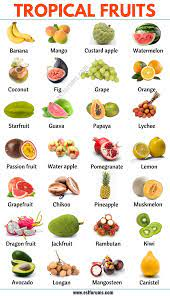
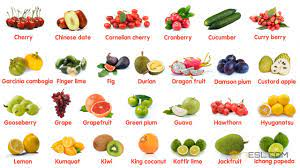
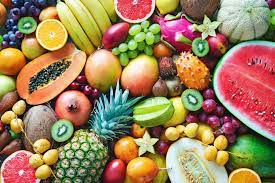
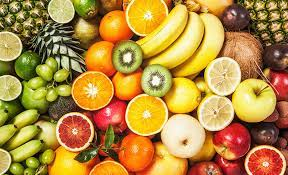
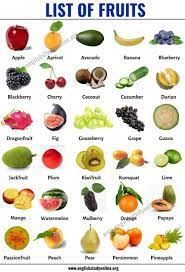
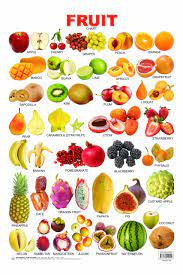
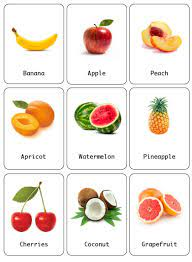
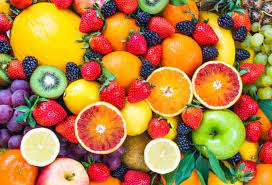
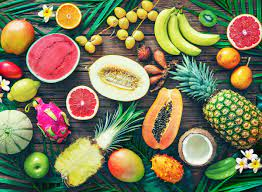
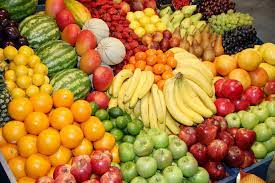
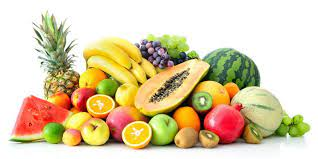
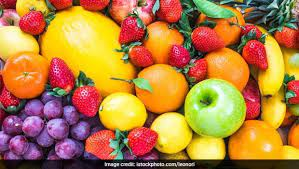
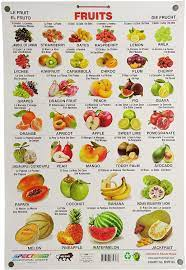
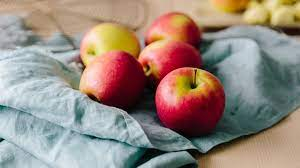
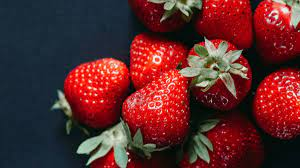
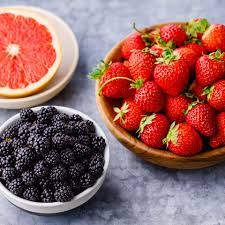
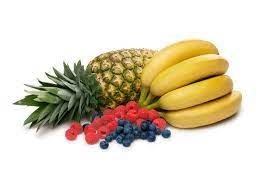
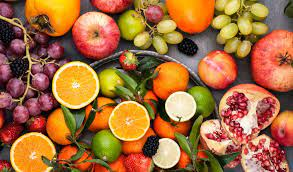
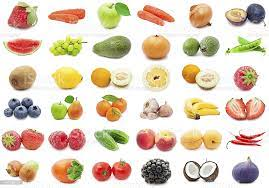
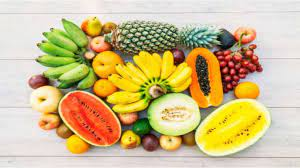
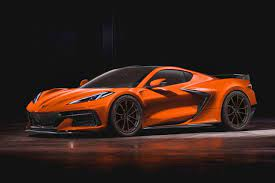
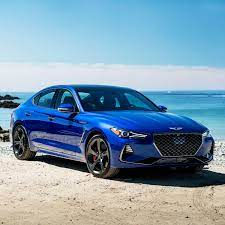
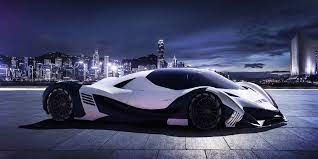
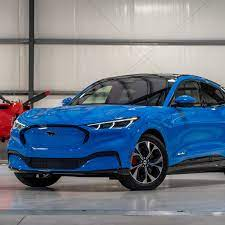
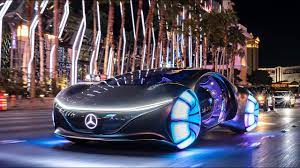
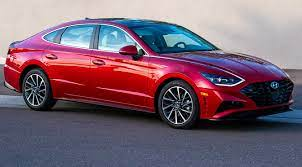
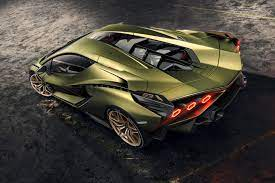
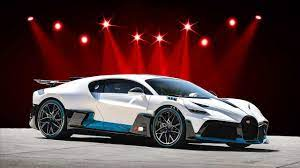
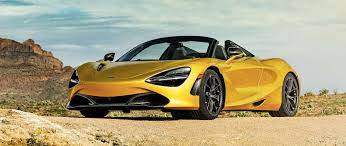
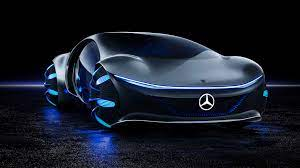
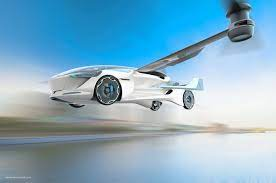
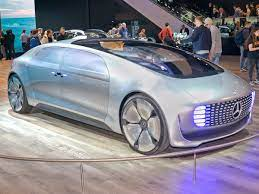
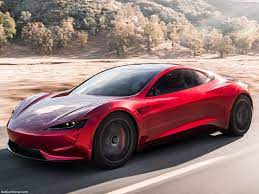
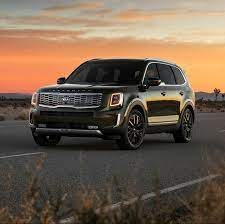
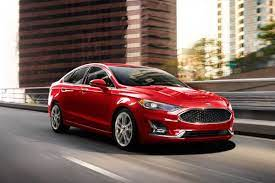
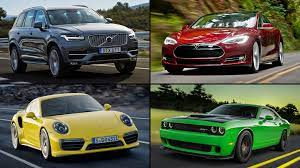
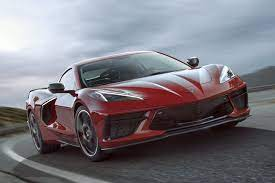
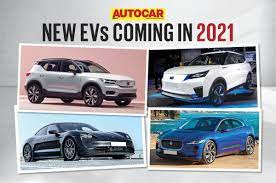
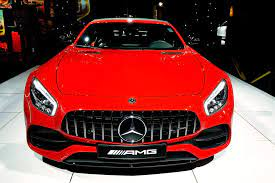
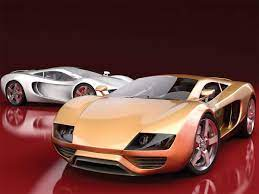
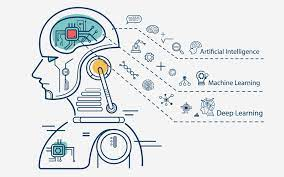
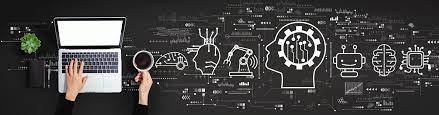
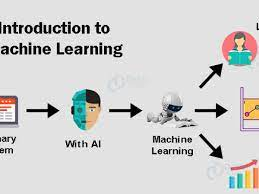
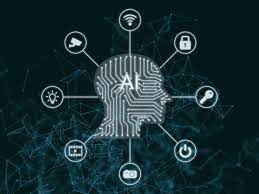
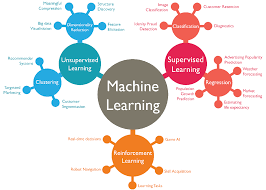
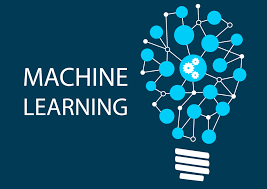
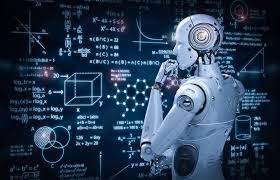
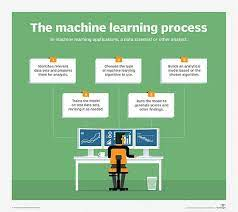
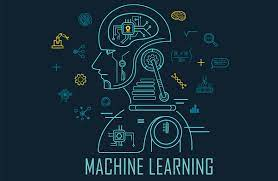
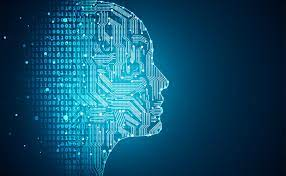
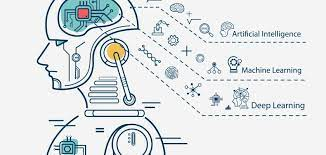
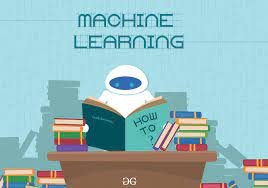
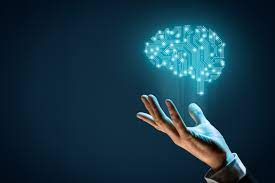
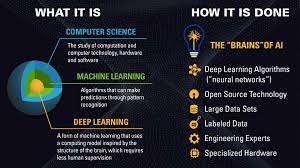
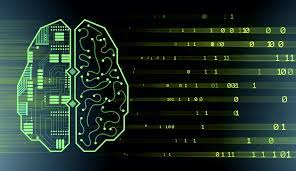
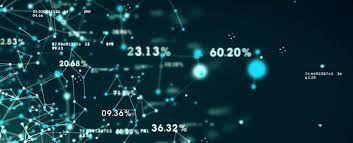
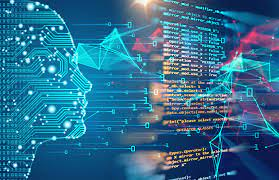
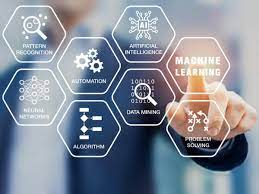
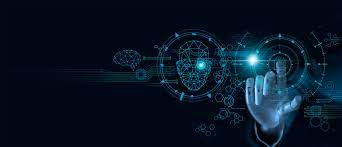
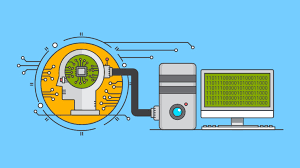

In [9]:
for a in array:
    url = "https://images.google.com/" 
    driver.get(url)
    search_image = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']") 
    search_image.send_keys(a)
    search_btn = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
    search_btn.click()
    
    value = 0
    for i in range(20):
        driver.execute_script("scrollBy("+ str(value) +",+1000);")
        value += 1000
        time.sleep(1)
    
    element = driver.find_element_by_id('islmp')
    sub_element = element.find_elements_by_tag_name('img')
    

    for j,i in enumerate(sub_element):
        if j < 100:
            src = i.get_attribute('src')                         
            try:
                if src != None:
                    src  = str(src)
                    print(src)
                    

                    urllib.request.urlretrieve(src, os.path.join(save_folder, a+str(j+1)+'.jpg'))
                else:
                    raise TypeError
            except Exception as e:             
                print(f'fail with error {e}')

# 4 Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. In case if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [11]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [90]:
url = "https://www.flipkart.com/" 
driver.get(url)

In [93]:
val = input("Enter your smartphone name: ")
print(val)

Enter your smartphone name: pixel 4A
pixel 4A


In [94]:
search_keyword = driver.find_element_by_xpath("//input[@class='_3704LK']")
search_keyword

<selenium.webdriver.remote.webelement.WebElement (session="635cf02ba16eb624ae5d3919cda55767", element="92701674-e533-4df4-b4c3-79a53099cb24")>

In [95]:
search_keyword.send_keys(val)

In [96]:
search_btn = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_btn.click()

In [97]:
product_ur=[]
product_url=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in product_url:
     product_ur.append(i.get_attribute('href'))

In [98]:
len(product_ur)

24

In [117]:
product_title=[]
brand=[]
color=[]
ram=[]
rom=[]
processor=[]
processor_core=[]
primary_camera=[]
secondary_camera=[]
display_size=[]
resolution=[]
price=[]
battery=[]
products_urlsss=[]

In [118]:
    for j in product_ur:
        driver.get(j)
        try:
            product_title_tags=driver.find_element_by_xpath("//span[@class='B_NuCI']")
            product_title.append(product_title_tags.text)
            
        except NoSuchElementException:                                                            
            product_title.append("-")    
            
            
        try:
            color_tags=driver.find_element_by_xpath("//tbody//tr[4]//td[2]")
            color.append(color_tags.text)
            
        except NoSuchElementException:                                                            
            color.append("-")     
            
            
            
        read_more = driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
        read_more.click()    
            
        try:
            ram_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[4]//table//tbody//tr[2]//td[2]")
            ram.append(ram_tags.text)
            
        except NoSuchElementException:                                                            
            ram.append("-")
            
            
            
        try:
            rom_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[4]//table//tbody//tr[1]//td[2]")
            rom.append(rom_tags.text)
            
        except NoSuchElementException:                                                            
            rom.append("-")   
            
            
        try:
            processor_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[3]//table//tbody//tr[2]//td[2]")
            processor.append(processor_tags.text)
        
        except NoSuchElementException:                                                            
            processor.append("-")             

            
            
            
        try:
            processor_core_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[3]//table//tbody//tr[3]//td[2]")
            processor_core.append(processor_core_tags.text)
            
        except NoSuchElementException:                                                            
            processor_core.append("-") 
            
            
        try:
            primary_camera_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[5]//table//tbody//tr[2]//td[2]")
            primary_camera.append(primary_camera_tags.text)
            
        except NoSuchElementException:                                                            
            primary_camera.append("-")
            
            
            
        try:
            secondary_camera_tags=driver.find_element_by_xpath("//div[@class='_2418kt']//ul//li[3]")
            secondary_camera.append(secondary_camera_tags.text)
            
        except NoSuchElementException:                                                            
            secondary_camera.append("-")
            
            
            
        try:
            display_size_tags=driver.find_element_by_xpath("//div[@class='_2418kt']//ul//li[2]")
            display_size.append(display_size_tags.text)
            
        except NoSuchElementException:                                                            
            display_size.append("-")
            
            
            
        try:
            resolution_tags=driver.find_element_by_xpath("//div[@class='_1UhVsV']//div[2]//table//tbody//tr[2]//td[2]")
            resolution.append(resolution_tags.text.replace("$$",""))
            
        except NoSuchElementException:                                                            
            resolution.append("-")

            
        
        try:
            price_tags=driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
            price.append(price_tags.text)
            
        except NoSuchElementException:                                                            
            price.append("-")
            
            
            
            
            
        try:
            battery_tags=driver.find_element_by_xpath("//div[@class='_2418kt']//ul//li[4]")
            battery.append(battery_tags.text)
            
        except NoSuchElementException:                                                            
            battery.append("-")
            
            
            
        products_urlsss.append(j)
            

            
            
        

In [84]:
product_title=[]
brand=[]
color=[]
ram=[]
rom=[]
processor=[]
processor_core=[]
primary_camera=[]
secondary_camera=[]
display_size=[]
resolution=[]
price=[]
battery=[]
products_urlsss=[]

In [150]:
product_title

['Google Pixel 4a (Just Black, 128 GB)  (6 GB RAM)',
 'REDMI Note 9 (Shadow Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Pebble Grey, 64 GB)  (4 GB RAM)',
 'REDMI 9 Prime (Mint Green, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Aqua Green, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Arctic White, 64 GB)  (4 GB RAM)',
 'REDMI 9 Prime (Sunrise Flare, 64 GB)  (4 GB RAM)',
 'REDMI 9 Prime (Matte Black, 64 GB)  (4 GB RAM)',
 'Panasonic ELUGA I6 (Black, 16 GB)  (2 GB RAM)',
 'Redmi 9 (Sky Blue, 64 GB)  (4 GB RAM)',
 'Redmi 9 (Carbon Black, 64 GB)  (4 GB RAM)',
 'SAMSUNG GALAXY M31S (Mirage Black, 128 GB)  (8 GB RAM)',
 'Redmi 9 (Sporty Orange, 64 GB)  (4 GB RAM)',
 'Redmi 9A (Midnight Black, 32 GB)  (2 GB RAM)',
 'Redmi 9A (Nature Green, 32 GB)  (2 GB RAM)',
 'Redmi 9A (SeaBlue, 32 GB)  (2 GB RAM)',
 'SAMSUNG Galaxy M31 (Space Black, 128 GB)  (6 GB RAM)',
 'Itel VISION1 (GRADATION GREEN, 32 GB)  (2 GB RAM)',
 'REDMI Note 9 (Arctic White, 128 GB)  (6 GB RAM)',
 'Panasonic Eluga I8 (Charcoal Black, 32 GB)  (

In [120]:
brand

[]

In [121]:
color

['Just Black',
 'Shadow Black',
 'Pebble Grey',
 'Mint Green',
 'Aqua Green',
 'Arctic White',
 'Sunrise Flare',
 'Matte Black',
 'Black',
 'Sky Blue',
 'Carbon Black',
 'Mirage Black',
 'Sporty Orange',
 'Midnight Black',
 'Nature Green',
 'SeaBlue',
 'Space Black',
 'GRADATION GREEN',
 'Arctic White',
 'Charcoal Black',
 'Midnight Blue',
 'Sky Blue',
 'Arctic White',
 'Ocean Blue']

In [122]:
ram

['6 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '2 GB',
 '4 GB',
 '4 GB',
 '8 GB',
 '4 GB',
 '2 GB',
 '2 GB',
 '2 GB',
 '6 GB',
 '2 GB',
 '6 GB',
 '3 GB',
 '4 GB',
 '4 GB',
 '4 GB',
 '8 GB']

In [123]:
rom

['128 GB',
 '64 GB',
 '64 GB',
 '64 GB',
 '64 GB',
 '64 GB',
 '64 GB',
 '64 GB',
 '16 GB',
 '64 GB',
 '64 GB',
 '128 GB',
 '64 GB',
 '32 GB',
 '32 GB',
 '32 GB',
 '128 GB',
 '32 GB',
 '128 GB',
 '32 GB',
 '64 GB',
 '128 GB',
 '128 GB',
 '128 GB']

In [124]:
processor

['Qualcomm Snapdragon 730G',
 'MediaTek Helio G85',
 'MediaTek Helio G85',
 'MediaTek Helio G80',
 'MediaTek Helio G85',
 'MediaTek Helio G85',
 'MediaTek Helio G80',
 'MediaTek Helio G80',
 'MediaTek',
 'MediaTek Helio G35',
 'MediaTek Helio G35',
 'Octa Core',
 'MediaTek Helio G35',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Samsung Exynos 9 Octa 9611',
 'UNISOC SC9863A OCTA CORE',
 'MediaTek Helio G85',
 'Meditek',
 ' Exynos 9611-Octa Core processor',
 'MediaTek Helio G35',
 'MediaTek Helio G85',
 'Samsung Exynos 9 Octa 9611']

In [125]:
processor_core

['Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Quad Core',
 '2.3 GHz',
 'Octa Core',
 '2.3 GHz',
 '2.3 GHz',
 '2 MHz',
 '2 GHz',
 '2 GHz',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 'Octa Core',
 '2.3 GHz',
 'Octa Core',
 'Octa Core']

In [147]:
primary_camera

['12.2MP Rear Camera',
 '48MP + 8MP + 2MP + 2MP',
 '48MP + 8MP + 2MP + 2MP',
 '13MP Rear Camera',
 '48MP + 8MP + 2MP + 2MP',
 '48MP + 8MP + 2MP + 2MP',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '8MP Rear Camera',
 '13MP + 2MP',
 '13MP + 2MP',
 'Primary Camera',
 '13MP + 8MP',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '-',
 '64MP + 8MP + 5MP + 5MP',
 '8MP Rear Camera',
 '48MP + 8MP + 2MP + 2MP',
 '13MP Rear Camera',
 '48MP + 8MP + 5MP',
 '13MP + 8MP',
 '48MP + 8MP + 2MP + 2MP',
 '64MP + 8MP + 5MP + 5MP']

In [148]:
secondary_camera

['12.2MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '64MP Rear Camera',
 '13MP + 8MP | 5MP Front Camera',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '64MP + 8MP + 5MP + 5MP | 32MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 5MP | 20MP Front Camera',
 '13MP + 8MP | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '64MP + 8MP + 5MP + 5MP | 32MP Front Camera']

In [139]:
display_size

['14.76 cm (5.81 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '13.84 cm (5.45 inch) FWVGA Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.51 cm (6.5 inch) Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.26 cm (6.4 inch) Full HD+ Display',
 '15.46 cm (6.088 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '15.8 cm (6.22 inch) HD+ Display',
 '16.26 cm (6.4 inch) Full HD+ Display',
 '16.59 cm (6.53 inch) HD+ Display',
 '16.59 cm (6.53 inch) Full HD+ Display',
 '16.26 cm (6.4 inch) Full HD+ Display']

In [129]:
resolution

['2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '2340 x 1080 Pixels',
 '960 x 480 pixel',
 '720 x 1600pixel',
 '720 x 1600pixel',
 '1080 x 2400pixel',
 '720 x 1600pixel',
 '720 x 1600pixel',
 '720 x 1600pixel',
 '720 x 1600pixel',
 '2340 x 1080pixel',
 '1560 x 720pixel',
 '2340 x 1080 Pixels',
 '1520 x 720pixel',
 '2340 x 1080Pixel',
 '720 x 1600pixel',
 '2340 x 1080 Pixels',
 '2340 x 1080pixel']

In [130]:
price

['₹31,999',
 '₹10,999',
 '₹10,999',
 '₹9,999',
 '₹10,999',
 '₹10,999',
 '₹9,999',
 '₹9,999',
 '₹5,005',
 '₹9,400',
 '₹9,452',
 '₹20,359',
 '₹9,235',
 '₹7,218',
 '₹7,199',
 '₹7,299',
 '₹17,989',
 '₹6,992',
 '₹13,999',
 '₹6,999',
 '₹15,900',
 '₹10,599',
 '₹12,999',
 '₹19,989']

In [131]:
battery

['3140 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '5020 mAh Battery',
 '3000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '4000 mAh Battery',
 '5020 mAh Battery',
 '4000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5020 mAh Battery',
 '6000 mAh Battery']

In [149]:
products_urlsss

['https://www.flipkart.com/google-pixel-4a-just-black-128-gb/p/itm023b9677aa45d?pid=MOBFUSBNAZGY7HQU&lid=LSTMOBFUSBNAZGY7HQUWHTF0C&marketplace=FLIPKART&q=pixel+4A&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=3b1d4707-9174-444e-bba2-da151afa5ef0.MOBFUSBNAZGY7HQU.SEARCH&ppt=hp&ppn=homepage&ssid=0ub7bre10w0000001625233992473&qH=9b26a23b2cff510d',
 'https://www.flipkart.com/redmi-note-9-shadow-black-64-gb/p/itm70628269ecd57?pid=MOBFXEPZM4DX89AQ&lid=LSTMOBFXEPZM4DX89AQLO98VX&marketplace=FLIPKART&q=pixel+4A&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=3b1d4707-9174-444e-bba2-da151afa5ef0.MOBFXEPZM4DX89AQ.SEARCH&ppt=hp&ppn=homepage&ssid=0ub7bre10w0000001625233992473&qH=9b26a23b2cff510d',
 'https://www.flipkart.com/redmi-note-9-pebble-grey-64-gb/p/itmb9c65ffe0ee74?pid=MOBFU3ZFQ3GAGANG&lid=LSTMOBFU3ZFQ3GAGANG1QDSWB&marketplace=FLIPKART&q=pixel+4A&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=3b1d4707-9174-444e

In [214]:
Product=pd.DataFrame({})
Product["Product name"]=product_title
Product["Product color"]=color
Product["RAM"]=ram
Product["ROM"]=rom
Product["processor"]=processor
Product["processorCore"]=processor_core
Product["Primary Camera"]=primary_camera
Product["Secondary Camera"]=secondary_camera
Product["Display size"]=display_size
Product["Resolution"]=resolution
Product["Price"]=price
Product["Battery"]=battery
Product["Product URL"]=products_urlsss


In [205]:
Product

,Product name,Product color,RAM,ROM,processor,processorCore,Primary Camera,Secondary Camera,Display size,Resolution,Price,Battery,Product URL
0,"Google Pixel 4a (Just Black, 128 GB) (6 GB RAM)",Just Black,6 GB,128 GB,Qualcomm Snapdragon 730G,Octa Core,12.2MP Rear Camera,12.2MP Rear Camera | 8MP Front Camera,14.76 cm (5.81 inch) Full HD+ Display,2340 x 1080 Pixels,"₹31,999",3140 mAh Battery,https://www.flipkart.com/google-pixel-4a-just-...
1,"REDMI Note 9 (Shadow Black, 64 GB) (4 GB RAM)",Shadow Black,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-shadow-b...
2,"REDMI Note 9 (Pebble Grey, 64 GB) (4 GB RAM)",Pebble Grey,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-pebble-g...
3,"REDMI 9 Prime (Mint Green, 64 GB) (4 GB RAM)",Mint Green,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,13MP Rear Camera | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-mint-gr...
4,"REDMI Note 9 (Aqua Green, 64 GB) (4 GB RAM)",Aqua Green,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-aqua-gre...
5,"REDMI Note 9 (Arctic White, 64 GB) (4 GB RAM)",Arctic White,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-arctic-w...
6,"REDMI 9 Prime (Sunrise Flare, 64 GB) (4 GB RAM)",Sunrise Flare,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,13MP Rear Camera | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-sunrise...
7,"REDMI 9 Prime (Matte Black, 64 GB) (4 GB RAM)",Matte Black,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,13MP Rear Camera | 8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-matte-b...
8,"Panasonic ELUGA I6 (Black, 16 GB) (2 GB RAM)",Black,2 GB,16 GB,MediaTek,Quad Core,8MP Rear Camera,8MP Rear Camera | 5MP Front Camera,13.84 cm (5.45 inch) FWVGA Display,960 x 480 pixel,"₹5,005",3000 mAh Battery,https://www.flipkart.com/panasonic-eluga-i6-bl...
9,"Redmi 9 (Sky Blue, 64 GB) (4 GB RAM)",Sky Blue,4 GB,64 GB,MediaTek Helio G35,2.3 GHz,13MP + 2MP,13MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,720 x 1600pixel,"₹9,400",5000 mAh Battery,https://www.flipkart.com/redmi-9-sky-blue-64-g...


In [220]:
secondary_camera

['12.2MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '64MP Rear Camera',
 '13MP + 8MP | 5MP Front Camera',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '13MP Rear Camera',
 '64MP + 8MP + 5MP + 5MP | 32MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '48MP + 8MP + 5MP | 20MP Front Camera',
 '13MP + 8MP | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '64MP + 8MP + 5MP + 5MP | 32MP Front Camera']

In [216]:
import re

In [217]:
def primary_camera(a):
    if re.search('\|.*', a):
        pos = re.search('\|.*', a).start()
  
        return a[:pos]
  
    else:
        return a

In [218]:
Product["Primary Camera"] = Product["Secondary Camera"].apply(primary_camera)

In [219]:
Product["Primary Camera"]

0         12.2MP Rear Camera 
1     48MP + 8MP + 2MP + 2MP 
2     48MP + 8MP + 2MP + 2MP 
3           13MP Rear Camera 
4     48MP + 8MP + 2MP + 2MP 
5     48MP + 8MP + 2MP + 2MP 
6           13MP Rear Camera 
7           13MP Rear Camera 
8            8MP Rear Camera 
9                 13MP + 2MP 
10                13MP + 2MP 
11           64MP Rear Camera
12                13MP + 8MP 
13           13MP Rear Camera
14           13MP Rear Camera
15           13MP Rear Camera
16    64MP + 8MP + 5MP + 5MP 
17           8MP Rear Camera 
18    48MP + 8MP + 2MP + 2MP 
19          13MP Rear Camera 
20          48MP + 8MP + 5MP 
21                13MP + 8MP 
22    48MP + 8MP + 2MP + 2MP 
23    64MP + 8MP + 5MP + 5MP 
Name: Primary Camera, dtype: object

In [221]:
def secondary_camera(a):
    if re.search('\|.*', a):
        pos = re.search('\|.*', a).start()
  
        return a[pos+1:]
  
    else:
        return "-"

In [222]:
Product["Secondary Camera"] = Product["Secondary Camera"].apply(secondary_camera)

In [223]:
Product["Secondary Camera"]

0       8MP Front Camera
1      13MP Front Camera
2      13MP Front Camera
3       8MP Front Camera
4      13MP Front Camera
5      13MP Front Camera
6       8MP Front Camera
7       8MP Front Camera
8       5MP Front Camera
9       5MP Front Camera
10      5MP Front Camera
11                     -
12      5MP Front Camera
13                     -
14                     -
15                     -
16     32MP Front Camera
17      5MP Front Camera
18     13MP Front Camera
19      8MP Front Camera
20     20MP Front Camera
21      5MP Front Camera
22     13MP Front Camera
23     32MP Front Camera
Name: Secondary Camera, dtype: object

In [224]:
Product

,Product name,Product color,RAM,ROM,processor,processorCore,Primary Camera,Secondary Camera,Display size,Resolution,Price,Battery,Product URL
0,"Google Pixel 4a (Just Black, 128 GB) (6 GB RAM)",Just Black,6 GB,128 GB,Qualcomm Snapdragon 730G,Octa Core,12.2MP Rear Camera,8MP Front Camera,14.76 cm (5.81 inch) Full HD+ Display,2340 x 1080 Pixels,"₹31,999",3140 mAh Battery,https://www.flipkart.com/google-pixel-4a-just-...
1,"REDMI Note 9 (Shadow Black, 64 GB) (4 GB RAM)",Shadow Black,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-shadow-b...
2,"REDMI Note 9 (Pebble Grey, 64 GB) (4 GB RAM)",Pebble Grey,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-pebble-g...
3,"REDMI 9 Prime (Mint Green, 64 GB) (4 GB RAM)",Mint Green,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-mint-gr...
4,"REDMI Note 9 (Aqua Green, 64 GB) (4 GB RAM)",Aqua Green,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-aqua-gre...
5,"REDMI Note 9 (Arctic White, 64 GB) (4 GB RAM)",Arctic White,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-arctic-w...
6,"REDMI 9 Prime (Sunrise Flare, 64 GB) (4 GB RAM)",Sunrise Flare,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-sunrise...
7,"REDMI 9 Prime (Matte Black, 64 GB) (4 GB RAM)",Matte Black,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-matte-b...
8,"Panasonic ELUGA I6 (Black, 16 GB) (2 GB RAM)",Black,2 GB,16 GB,MediaTek,Quad Core,8MP Rear Camera,5MP Front Camera,13.84 cm (5.45 inch) FWVGA Display,960 x 480 pixel,"₹5,005",3000 mAh Battery,https://www.flipkart.com/panasonic-eluga-i6-bl...
9,"Redmi 9 (Sky Blue, 64 GB) (4 GB RAM)",Sky Blue,4 GB,64 GB,MediaTek Helio G35,2.3 GHz,13MP + 2MP,5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,720 x 1600pixel,"₹9,400",5000 mAh Battery,https://www.flipkart.com/redmi-9-sky-blue-64-g...


In [225]:
def brands(a):
    if re.search('\s.*', a):
        pos = re.search('\s.*', a).start()
  
        return a[:pos]
  
    else:
        return a

In [226]:
Product["Brand"] = Product["Product name"].apply(brands)

In [227]:
Product["Brand"]

0        Google
1         REDMI
2         REDMI
3         REDMI
4         REDMI
5         REDMI
6         REDMI
7         REDMI
8     Panasonic
9         Redmi
10        Redmi
11      SAMSUNG
12        Redmi
13        Redmi
14        Redmi
15        Redmi
16      SAMSUNG
17         Itel
18        REDMI
19    Panasonic
20      SAMSUNG
21        Redmi
22        REDMI
23      SAMSUNG
Name: Brand, dtype: object

In [228]:
Product

,Product name,Product color,RAM,ROM,processor,processorCore,Primary Camera,Secondary Camera,Display size,Resolution,Price,Battery,Product URL,Brand
0,"Google Pixel 4a (Just Black, 128 GB) (6 GB RAM)",Just Black,6 GB,128 GB,Qualcomm Snapdragon 730G,Octa Core,12.2MP Rear Camera,8MP Front Camera,14.76 cm (5.81 inch) Full HD+ Display,2340 x 1080 Pixels,"₹31,999",3140 mAh Battery,https://www.flipkart.com/google-pixel-4a-just-...,Google
1,"REDMI Note 9 (Shadow Black, 64 GB) (4 GB RAM)",Shadow Black,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-shadow-b...,REDMI
2,"REDMI Note 9 (Pebble Grey, 64 GB) (4 GB RAM)",Pebble Grey,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-pebble-g...,REDMI
3,"REDMI 9 Prime (Mint Green, 64 GB) (4 GB RAM)",Mint Green,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-mint-gr...,REDMI
4,"REDMI Note 9 (Aqua Green, 64 GB) (4 GB RAM)",Aqua Green,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-aqua-gre...,REDMI
5,"REDMI Note 9 (Arctic White, 64 GB) (4 GB RAM)",Arctic White,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-arctic-w...,REDMI
6,"REDMI 9 Prime (Sunrise Flare, 64 GB) (4 GB RAM)",Sunrise Flare,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-sunrise...,REDMI
7,"REDMI 9 Prime (Matte Black, 64 GB) (4 GB RAM)",Matte Black,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-matte-b...,REDMI
8,"Panasonic ELUGA I6 (Black, 16 GB) (2 GB RAM)",Black,2 GB,16 GB,MediaTek,Quad Core,8MP Rear Camera,5MP Front Camera,13.84 cm (5.45 inch) FWVGA Display,960 x 480 pixel,"₹5,005",3000 mAh Battery,https://www.flipkart.com/panasonic-eluga-i6-bl...,Panasonic
9,"Redmi 9 (Sky Blue, 64 GB) (4 GB RAM)",Sky Blue,4 GB,64 GB,MediaTek Helio G35,2.3 GHz,13MP + 2MP,5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,720 x 1600pixel,"₹9,400",5000 mAh Battery,https://www.flipkart.com/redmi-9-sky-blue-64-g...,Redmi


In [229]:
Smartphone=pd.DataFrame({})
Smartphone["Brand"]=Product["Brand"]
Smartphone["Smartphone name"]=Product["Product name"]
Smartphone["Product color"]=Product["Product color"]
Smartphone["RAM"]=Product["RAM"]
Smartphone["ROM"]=Product["ROM"]
Smartphone["processor"]=Product["processor"]
Smartphone["processorCore"]=Product["processorCore"]
Smartphone["Primary Camera"]=Product["Primary Camera"]
Smartphone["Secondary Camera"]=Product["Secondary Camera"]
Smartphone["Display size"]=Product["Display size"]
Smartphone["Resolution"]=Product["Resolution"]
Smartphone["Price"]=Product["Price"]
Smartphone["Battery"]=Product["Battery"]
Smartphone["Product URL"]=Product["Product URL"]


In [230]:
Smartphone

,Brand,Smartphone name,Product color,RAM,ROM,processor,processorCore,Primary Camera,Secondary Camera,Display size,Resolution,Price,Battery,Product URL
0,Google,"Google Pixel 4a (Just Black, 128 GB) (6 GB RAM)",Just Black,6 GB,128 GB,Qualcomm Snapdragon 730G,Octa Core,12.2MP Rear Camera,8MP Front Camera,14.76 cm (5.81 inch) Full HD+ Display,2340 x 1080 Pixels,"₹31,999",3140 mAh Battery,https://www.flipkart.com/google-pixel-4a-just-...
1,REDMI,"REDMI Note 9 (Shadow Black, 64 GB) (4 GB RAM)",Shadow Black,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-shadow-b...
2,REDMI,"REDMI Note 9 (Pebble Grey, 64 GB) (4 GB RAM)",Pebble Grey,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-pebble-g...
3,REDMI,"REDMI 9 Prime (Mint Green, 64 GB) (4 GB RAM)",Mint Green,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-mint-gr...
4,REDMI,"REDMI Note 9 (Aqua Green, 64 GB) (4 GB RAM)",Aqua Green,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-aqua-gre...
5,REDMI,"REDMI Note 9 (Arctic White, 64 GB) (4 GB RAM)",Arctic White,4 GB,64 GB,MediaTek Helio G85,Octa Core,48MP + 8MP + 2MP + 2MP,13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹10,999",5020 mAh Battery,https://www.flipkart.com/redmi-note-9-arctic-w...
6,REDMI,"REDMI 9 Prime (Sunrise Flare, 64 GB) (4 GB RAM)",Sunrise Flare,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-sunrise...
7,REDMI,"REDMI 9 Prime (Matte Black, 64 GB) (4 GB RAM)",Matte Black,4 GB,64 GB,MediaTek Helio G80,Octa Core,13MP Rear Camera,8MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,2340 x 1080 Pixels,"₹9,999",5020 mAh Battery,https://www.flipkart.com/redmi-9-prime-matte-b...
8,Panasonic,"Panasonic ELUGA I6 (Black, 16 GB) (2 GB RAM)",Black,2 GB,16 GB,MediaTek,Quad Core,8MP Rear Camera,5MP Front Camera,13.84 cm (5.45 inch) FWVGA Display,960 x 480 pixel,"₹5,005",3000 mAh Battery,https://www.flipkart.com/panasonic-eluga-i6-bl...
9,Redmi,"Redmi 9 (Sky Blue, 64 GB) (4 GB RAM)",Sky Blue,4 GB,64 GB,MediaTek Helio G35,2.3 GHz,13MP + 2MP,5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,720 x 1600pixel,"₹9,400",5000 mAh Battery,https://www.flipkart.com/redmi-9-sky-blue-64-g...


# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.


In [213]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [376]:
url = "https://www.google.com/maps" 
driver.get(url)

In [377]:
search_location = driver.find_element_by_xpath("//input[@autofocus='autofocus']") 
search_location

<selenium.webdriver.remote.webelement.WebElement (session="4cba7fa414d557aaebfc40de1059c14c", element="bc1dbd07-83b2-45fc-980f-ad534eaaed6d")>

In [378]:
val = input("Enter your location: ")
print(val)

Enter your location: Pune
Pune


In [379]:
search_location.send_keys(val)

In [380]:
search_btn = driver.find_element_by_xpath("//button[@aria-label='Search']")
search_btn.click()

In [381]:
import re

In [382]:
time.sleep(5)
url = driver.current_url

In [383]:
url

'https://www.google.com/maps/place/Pune,+Maharashtra/@18.5247663,73.7929268,12z/data=!3m1!4b1!4m5!3m4!1s0x3bc2bf2e67461101:0x828d43bf9d9ee343!8m2!3d18.5204303!4d73.8567437'

In [384]:
start = re.search('\@.*', url).start()
end = re.search('/data.*', url).start()-4



In [385]:
if (url[end]==","):
    new_end=end
if (url[end-1]==","):
    newend=end-1 
if (url[end+1]==","):
    newend=end-1  

In [386]:
cordinates=url[start+1:new_end]

In [387]:
print("The cordinates of ",val," city is (",cordinates,")")

The cordinates of  Pune  city is ( 18.5247663,73.7929268 )


#  6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [389]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [439]:
url = "https://trak.in/india-startup-funding-investment-2015/" 
driver.get(url)

In [452]:
july_report=[]

In [453]:
for i in range(1,11):
    for j in range(1,10):
        
        july=driver.find_element_by_xpath("/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[11]/div[3]/div[2]/table/tbody/tr[{}]/td[{}]".format(i,j))
        july_report.append(july.text.replace("\n",''))

In [463]:
july_report

['1',
 '15/07/2020',
 'Flipkart',
 'E-commerce',
 'E-commerce',
 'Bangalore',
 'Walmart Inc',
 'M&A',
 '1,200,000,000',
 '2',
 '16/07/2020',
 'Vedantu',
 'EduTech',
 'Online Tutoring',
 'Bangalore',
 'Coatue Management',
 'Series D',
 '100,000,000',
 '3',
 '16/07/2020',
 'Crio',
 'EduTech',
 'Learning Platform for Developers',
 'Bangalore',
 '021 Capital',
 'pre-Series A',
 '934,160',
 '4',
 '14/07/2020',
 'goDutch',
 'FinTech',
 'Group Payments',
 'Mumbai',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
 'Seed',
 '1,700,000',
 '5',
 '13/07/2020',
 'Mystifly',
 'Airfare Marketplace',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Singapore and Bangalore',
 'Recruit Co. Ltd.',
 'pre-Series B',
 '3,300,000',
 '6',
 '09/07/2020',
 'JetSynthesys',
 'Gaming and Entertainment',
 'Gaming and Entertainment',
 'Pune',
 'Adar Poonawalla and Kris Gopalakrishnan.',
 'Venture-Series Unknown',
 '400,000',
 '7',
 '10/07/2020',
 'gigIndia',
 'Ma

In [464]:
len(july_report)

90

In [457]:
August_report=[]

In [458]:
for i in range(1,11):
    for j in range(1,10):
        
        August=driver.find_element_by_xpath("/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[10]/div[3]/div[2]/table/tbody/tr[{}]/td[{}]".format(i,j))
        August_report.append(August.text.replace("\n",''))

In [459]:
August_report

['1',
 '15/08/2020',
 'Practo',
 'HealthTech',
 'Health care and Wellness',
 'Bangalore',
 'A1A Company',
 'Series F',
 '32,000,000',
 '2',
 '13/08/2020',
 'Medlife',
 'E-commerce',
 'Online Pharmacy',
 'Bangalore',
 'Prasid Uno Family Trust and SC Credit Fund',
 '',
 '23,000,000',
 '3',
 '13/08/2020',
 'HungerBox',
 'FoodTech',
 'Online Food Delivery Service',
 'Bangalore',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Series D1',
 '1,560,000',
 '4',
 '04/08/2020',
 'Dunzo',
 'Hyper-local Logistics',
 'Online Delivery Services',
 'Bangalore',
 'Existing Backers',
 'In Progress',
 '30,000,000',
 '5',
 '11/08/2020',
 'Terra.do',
 'EduTech',
 'Online Climate School, E-learning',
 'Stanford, California,',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Seed',
 '1,400,000',
 '6',
 '12/08/2020',
 'Classplus',
 'EduTech',
 'E-learning, Online Tutoring',
 'Noida',
 'Falcon Edge',
 'In Progress',
 'upto 15,000,000',
 

In [465]:
len(August_report)

90

In [460]:
September_report=[]

In [461]:
for i in range(1,11):
    for j in range(1,10):
        
        September=driver.find_element_by_xpath("/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[9]/div[3]/div[2]/table/tbody/tr[{}]/td[{}]".format(i,j))
        September_report.append(September.text.replace("\n",''))

In [462]:
September_report

['1',
 '08/09/2020',
 'Byju’s',
 'EduTech',
 'Online Tutoring',
 'Bangalore',
 'Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Private Equity',
 '500,000,000',
 '2',
 '12/09/2020',
 'mCaffeine',
 'Personal Care',
 'Skincare & Haircare',
 'Mumbai',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Series B',
 '3,000,000',
 '3',
 '09/09/2020',
 'Qshala',
 'EduTech',
 'Online Curiosity Platform for Kids',
 'Bangalore',
 'Rainmatter Capital',
 'Angel',
 '370,000',
 '4',
 '02/09/2020',
 'Winzo',
 'Online Gaming',
 'Online Gaming',
 'New Delhi',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Series B',
 '15,500,000',
 '5',
 '09/09/2020',
 'Hippo Video',
 'Video Customer Experience(CX) Platform',
 'Video Customer Experience(CX) Platform',
 'Newark, Delaware, United States of Amercia',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Series A',
 '4,500,000',
 '6',
 '07/09/202

In [466]:
len(September_report)

90

In [472]:
import numpy as np

In [477]:
july_report=np.reshape(july_report,(10,9))

In [478]:
july_report

array([['1', '15/07/2020', 'Flipkart', 'E-commerce', 'E-commerce',
        'Bangalore', 'Walmart Inc', 'M&A', '1,200,000,000'],
       ['2', '16/07/2020', 'Vedantu', 'EduTech', 'Online Tutoring',
        'Bangalore', 'Coatue Management', 'Series D', '100,000,000'],
       ['3', '16/07/2020', 'Crio', 'EduTech',
        'Learning Platform for Developers', 'Bangalore', '021 Capital',
        'pre-Series A', '934,160'],
       ['4', '14/07/2020', 'goDutch', 'FinTech', 'Group Payments',
        'Mumbai',
        'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.',
        'Seed', '1,700,000'],
       ['5', '13/07/2020', 'Mystifly', 'Airfare Marketplace',
        'Ticketing, Airline Retailing, and Post-Ticketing Services',
        'Singapore and Bangalore', 'Recruit Co. Ltd.', 'pre-Series B',
        '3,300,000'],
       ['6', '09/07/2020', 'JetSynthesys', 'Gaming and Entertainment',
        'Gaming and Entertainment', 'Pune',
        'Adar Poonawalla and Kri

In [484]:
july_report=pd.DataFrame(july_report)

In [485]:
july_report

,0,1,2,3,4,5,6,7,8
0,1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,10,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [480]:
August_report=np.reshape(August_report,(10,9))

In [481]:
August_report

array([['1', '15/08/2020', 'Practo', 'HealthTech',
        'Health care and Wellness', 'Bangalore', 'A1A Company',
        'Series F', '32,000,000'],
       ['2', '13/08/2020', 'Medlife', 'E-commerce', 'Online Pharmacy',
        'Bangalore', 'Prasid Uno Family Trust and SC Credit Fund', '',
        '23,000,000'],
       ['3', '13/08/2020', 'HungerBox', 'FoodTech',
        'Online Food Delivery Service', 'Bangalore',
        'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
        'Series D1', '1,560,000'],
       ['4', '04/08/2020', 'Dunzo', 'Hyper-local Logistics',
        'Online Delivery Services', 'Bangalore', 'Existing Backers',
        'In Progress', '30,000,000'],
       ['5', '11/08/2020', 'Terra.do', 'EduTech',
        'Online Climate School, E-learning', 'Stanford, California,',
        'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
        'Seed', '1,400,000'],
       ['6', '12/08/2020', 'Classplus', 'EduTe

In [486]:
August_report=pd.DataFrame(August_report)
August_report

,0,1,2,3,4,5,6,7,8
0,1,15/08/2020,Practo,HealthTech,Health care and Wellness,Bangalore,A1A Company,Series F,"32,000,000"
1,2,13/08/2020,Medlife,E-commerce,Online Pharmacy,Bangalore,Prasid Uno Family Trust and SC Credit Fund,,"23,000,000"
2,3,13/08/2020,HungerBox,FoodTech,Online Food Delivery Service,Bangalore,"One97, Sabre Partners Trust, Pratithi Investme...",Series D1,"1,560,000"
3,4,04/08/2020,Dunzo,Hyper-local Logistics,Online Delivery Services,Bangalore,Existing Backers,In Progress,"30,000,000"
4,5,11/08/2020,Terra.do,EduTech,"Online Climate School, E-learning","Stanford, California,","Stanford Angels and Entrepreneurs (India), BEE...",Seed,"1,400,000"
5,6,12/08/2020,Classplus,EduTech,"E-learning, Online Tutoring",Noida,Falcon Edge,In Progress,"upto 15,000,000"
6,7,14/08/2020,Niyo,FinTech,Financial Services,Bangalore,Niyo Solutions Inc.,,"6,000,000"
7,8,10/08/2020,ZestMoney,FinTech,Financial Services,Bangalore,Primrose Hills Ventures,,"10,670,000"
8,9,07/08/2020,FreshToHome,E-commerce,Food Delivery,Bangalore,Ascent Capital,Venture,"16,200,000"
9,10,13/08/2020,Eduvanz,FinTech,Financial Services,Mumbai,"Sequoia India, Unitus",Series A,"5,000,000"


In [487]:
September_report=np.reshape(September_report,(10,9))

In [488]:
September_report

array([['1', '08/09/2020', 'Byju’s', 'EduTech', 'Online Tutoring',
        'Bangalore',
        'Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
        'Private Equity', '500,000,000'],
       ['2', '12/09/2020', 'mCaffeine', 'Personal Care',
        'Skincare & Haircare', 'Mumbai',
        'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
        'Series B', '3,000,000'],
       ['3', '09/09/2020', 'Qshala', 'EduTech',
        'Online Curiosity Platform for Kids', 'Bangalore',
        'Rainmatter Capital', 'Angel', '370,000'],
       ['4', '02/09/2020', 'Winzo', 'Online Gaming', 'Online Gaming',
        'New Delhi',
        'Kalaari Capital Partners, IndigoEdge Management Consultancy',
        'Series B', '15,500,000'],
       ['5', '09/09/2020', 'Hippo Video',
        'Video Customer Experience(CX) Platform',
        'Video Customer Experience(CX) Platform',
        'Newark, Delaware, United States of Amercia',
     

In [489]:
September_report=pd.DataFrame(September_report)
September_report

,0,1,2,3,4,5,6,7,8
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


In [495]:
title=[]

In [496]:
    for i in range(1,10):
        
        title_tags=driver.find_element_by_xpath("/html/body/div[1]/main/div/div/div/div[2]/div[1]/div/div/div/div[1]/div/div[9]/div[3]/div[1]/div/table/thead/tr/th[{}]".format(i))
        title.append(title_tags.text.replace("\n",''))

In [497]:
title

['Sr. No.',
 'Date (dd/mm/yyyy)',
 'Startup Name',
 'Industry / Vertical',
 'Sub-Vertical',
 'City / Location',
 "Investors' Name",
 'Investment Type',
 'Amount (In USD)']

In [506]:
Report=pd.DataFrame({})

In [507]:
frames = [july_report, August_report, September_report]

In [508]:
Report=pd.concat(frames)

In [509]:
Report

,0,1,2,3,4,5,6,7,8
0,1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,10,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [510]:
Report=Report.reset_index()

Report=Report.drop("index",axis=1)

In [511]:
Report

,0,1,2,3,4,5,6,7,8
0,1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,10,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [513]:
Report=Report.drop(0,axis=1)

In [514]:
Report

,1,2,3,4,5,6,7,8
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [518]:
title

['Sr. No.',
 'Date (dd/mm/yyyy)',
 'Startup Name',
 'Industry / Vertical',
 'Sub-Vertical',
 'City / Location',
 "Investors' Name",
 'Investment Type',
 'Amount (In USD)']

In [520]:
Report.columns=[
 'Date (dd/mm/yyyy)',
 'Startup Name',
 'Industry / Vertical',
 'Sub-Vertical',
 'City / Location',
 "Investors' Name",
 'Investment Type',
 'Amount (In USD)']

In [521]:
Report

,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


# 7. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [230]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [234]:
url = 'https://www.digit.in/#search' 
driver.get(url)

In [235]:
search_laptop = driver.find_elements_by_xpath("//input[@type='search']") 
search_laptop

[<selenium.webdriver.remote.webelement.WebElement (session="b5312d102253313827e4897c1141acbb", element="0648c4f0-99eb-48f4-a817-3ecdb0791f9a")>]

In [236]:
search_laptop[0].send_keys("gaming laptops"+ "\n")


In [238]:
click_on_top_10 = driver.find_elements_by_xpath("/html/body/div[6]/div[2]/div[1]/div/form/ul/li[5]/label") 
click_on_top_10[0].click()

In [239]:
best_gaming_laptops = driver.find_elements_by_xpath("/html/body/div[6]/div[2]/div[2]/div[4]/a/div") 
best_gaming_laptops[0].click()

In [240]:
name_tags=driver.find_elements_by_xpath("//h3") 

In [241]:
name=[]
for i in name_tags:
        name.append(i.text) 
name

['ALIENWARE AREA 51M R2',
 'ALIENWARE M15 R3',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ROG ZEPHYRUS G14',
 'LENOVO LEGION 5I',
 'ASUS ROG ZEPHYRUS DUO 15',
 'ACER ASPIRE 7 GAMING']

In [310]:

details=[]

for i in range(3,10):
    
    details_tag=driver.find_elements_by_xpath("/html/body/div[3]/div[1]/div[4]/div[@class='Section-center']/div[@class='Spcs-details']/table/tbody/tr[{}]/td[3]".format(i))
    for j in details_tag:
        details.append(j.text.replace("\n",''))


In [311]:
details

['Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Pro',
 'Windows 10',
 'Windows 10 Home',
 '17.3" (1920 x 1080)',
 '15.6" (3840 x 2160)',
 '15.6" (1920 x 1080)',
 '14" (1920 x 1080)',
 '15.6" (1920 x 1080)',
 '15.6" (3840 x 1100)',
 '15.6" (1920 x 1080)',
 '10th Generation Intel® Core™ i7-10700 | 2.90 GHz',
 '10th Generation Intel® Core™ i9-10980HK | NA',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz',
 'AMD 3rd Generation Ryzen 9 | 3.3 GHz',
 '10th Generation Intel® Core™ i5-10300H | 2.50 GHz',
 'Intel Core i7 10th Gen 10875H | NA',
 'AMD Ryzen™ 5-5500U hexa-core | NA',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4',
 '4.1',
 'NA',
 '2.30',
 '1.65',
 '2.3',
 '2.4',
 '2.15',
 '27.65 x 402.6 x 319.14',
 'NA',
 '35.4 x 25.9 x 2.26',
 '32.5 x 22.1 x 1.8',
 '363.06 x 259.61 x 23.57',
 '268.30 x 360.00 x 20.90',
 '2.29 x 36.3 x

In [312]:
len(details)

49

In [313]:
os=[]
display=[]
processor=[]
memory=[]
weight=[]
dimension=[]
graphics_processor=[]

In [316]:
a=len(details)/7

In [321]:
a

7.0

In [325]:
a=int(a)

In [326]:
a

7

In [327]:
os=details[0:a]
display=details[a:2*a]
processor=details[2*a:3*a]
memory=details[3*a:4*a]
weight=details[4*a:5*a]
dimension=details[5*a:6*a]
graphics_processor=details[6*a:7*a]

In [328]:
os

['Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Home',
 'Windows 10 Pro',
 'Windows 10',
 'Windows 10 Home']

In [329]:
display

['17.3" (1920 x 1080)',
 '15.6" (3840 x 2160)',
 '15.6" (1920 x 1080)',
 '14" (1920 x 1080)',
 '15.6" (1920 x 1080)',
 '15.6" (3840 x 1100)',
 '15.6" (1920 x 1080)']

In [330]:
processor

['10th Generation Intel® Core™ i7-10700 | 2.90 GHz',
 '10th Generation Intel® Core™ i9-10980HK | NA',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz',
 'AMD 3rd Generation Ryzen 9 | 3.3 GHz',
 '10th Generation Intel® Core™ i5-10300H | 2.50 GHz',
 'Intel Core i7 10th Gen 10875H | NA',
 'AMD Ryzen™ 5-5500U hexa-core | NA']

In [331]:
memory

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [332]:
weight

['4.1', 'NA', '2.30', '1.65', '2.3', '2.4', '2.15']

In [333]:
dimension

['27.65 x 402.6 x 319.14',
 'NA',
 '35.4 x 25.9 x 2.26',
 '32.5 x 22.1 x 1.8',
 '363.06 x 259.61 x 23.57',
 '268.30 x 360.00 x 20.90',
 '2.29 x 36.3 x 25.4']

In [334]:
graphics_processor

['Intel® UHD Graphics 630',
 'NA',
 'NVIDIA® GeForce RTX™ 3070',
 'NVIDIA GeForce RTX 2060',
 'NVIDIA® GeForce® GTX 1650 4GB',
 'NVIDIA GeForce RTX 2070 Max-Q',
 'NVIDIA® GeForce® GTX 1650']

In [335]:
Laptop=pd.DataFrame({})
Laptop["Name"]=name
Laptop["OS"]=os
Laptop["Display"]=display
Laptop["Processor"]=processor
Laptop["Memory"]=memory
Laptop["Weight"]=weight
Laptop["Dimension"]=dimension
Laptop["Graphics Processor"]=graphics_processor

In [336]:
Laptop

,Name,OS,Display,Processor,Memory,Weight,Dimension,Graphics Processor
0,ALIENWARE AREA 51M R2,Windows 10 Home,"17.3"" (1920 x 1080)",10th Generation Intel® Core™ i7-10700 | 2.90 GHz,1 TB SSD/16 GBGB DDR4,4.1,27.65 x 402.6 x 319.14,Intel® UHD Graphics 630
1,ALIENWARE M15 R3,Windows 10 Home,"15.6"" (3840 x 2160)",10th Generation Intel® Core™ i9-10980HK | NA,1 TB SSD/16 GBGB DDR4,NA,NA,NA
2,ASUS ROG STRIX SCAR 15,Windows 10 Home,"15.6"" (1920 x 1080)",AMD Ryzen™ 9 5900HX | 3.3 GHz,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,NVIDIA® GeForce RTX™ 3070
3,ASUS ROG ZEPHYRUS G14,Windows 10 Home,"14"" (1920 x 1080)",AMD 3rd Generation Ryzen 9 | 3.3 GHz,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,NVIDIA GeForce RTX 2060
4,LENOVO LEGION 5I,Windows 10 Pro,"15.6"" (1920 x 1080)",10th Generation Intel® Core™ i5-10300H | 2.50 GHz,1 TB SSD/16 GBGB DDR4,2.3,363.06 x 259.61 x 23.57,NVIDIA® GeForce® GTX 1650 4GB
5,ASUS ROG ZEPHYRUS DUO 15,Windows 10,"15.6"" (3840 x 1100)",Intel Core i7 10th Gen 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,NVIDIA GeForce RTX 2070 Max-Q
6,ACER ASPIRE 7 GAMING,Windows 10 Home,"15.6"" (1920 x 1080)",AMD Ryzen™ 5-5500U hexa-core | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,NVIDIA® GeForce® GTX 1650


# 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [565]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [570]:
url = 'https://www.forbes.com/billionaires/' 
driver.get(url)

In [578]:
rank_tags = driver.find_elements_by_xpath("//div[@class='rank']") 


In [579]:
rank=[]
for i in rank_tags:
        rank.append(i.text) 
rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [582]:
len(rank)

200

In [580]:
person_name_tags = driver.find_elements_by_xpath("//div[@class='personName']") 


In [581]:
person_name=[]
for i in person_name_tags:
        person_name.append(i.text) 
person_name

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [583]:
len(person_name)

200

In [584]:
net_worth_tags = driver.find_elements_by_xpath("//div[@class='netWorth']") 

In [585]:
net_worth=[]
for i in net_worth_tags:
        net_worth.append(i.text) 
net_worth

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [586]:
len(net_worth)

200

In [587]:
age_tags = driver.find_elements_by_xpath("//div[@class='age']") 

In [588]:
age=[]
for i in age_tags:
        age.append(i.text) 
age

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [589]:
len(age)

200

In [591]:
citizenship_tags = driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']") 

In [592]:
citizenship=[]
for i in citizenship_tags:
        citizenship.append(i.text) 
citizenship

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [593]:
len(citizenship)

200

In [594]:
source_tags = driver.find_elements_by_xpath("//div[@class='source']") 

In [595]:
source=[]
for i in source_tags:
        source.append(i.text) 
source

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [596]:
len(source_tags)

200

In [597]:
category_tags = driver.find_elements_by_xpath("//div[@class='category']") 

In [598]:
category=[]
for i in category_tags:
        category.append(i.text) 
category

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [599]:
len(category)

200

In [603]:
Billionaires=pd.DataFrame({})
Billionaires["Rank"]=rank
Billionaires["Name"]=person_name
Billionaires["Net worth"]=net_worth
Billionaires["Age"]=age
Billionaires["Citizenship"]=citizenship
Billionaires["Source"]=source
Billionaires["Industry"]=category



In [604]:
Billionaires

,Rank,Name,Net worth,Age,Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


# 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [102]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [103]:
url = 'https://www.youtube.com'
driver.get(url)

In [106]:
val = input("Enter your video search: ")
print(val)

Enter your video search: funny videos
funny videos


In [107]:
search_keyword = driver.find_element_by_id('search') 
search_keyword

<selenium.webdriver.remote.webelement.WebElement (session="769dd98cc0487b90dcbbb1bfee1e4a26", element="840b8703-8737-4595-9af1-8ced2a4035d0")>

In [108]:
search_keyword.send_keys(val)

In [109]:
video_search=driver.find_element_by_xpath("//button[@id='search-icon-legacy']")

In [110]:
video_search.click()

In [111]:
first_video_tag=driver.find_element_by_xpath("/html/body/ytd-app/div/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a")

In [112]:
first_video_tag.click()

Need to scroll the video mannually as I have checked with Sajid and even he could not manage to provide me with the correct scrolling code to scroll all the way to the bottom.I have searched for many solutions but could not manage to find a code to scroll and load the comments all the way to the bottom of the page. The code that
did not work, that was provided was:

for _ in range(1000):

    driver.execute_script("window.scrollBy(0,10000)")

In [113]:
driver.execute_script("scrollBy("+ str(value) +",+300);")
time.sleep(3)

In [114]:
n=driver.find_element_by_xpath("/html/body/ytd-app/div/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/ytd-comments/ytd-item-section-renderer/div[1]/ytd-comments-header-renderer/div[1]/h2/yt-formatted-string/span[1]")

In [115]:
n.text

'222'

In [116]:
n=n.text.replace(",",'')

In [117]:
n

'222'

In [118]:
n=int(n)

In [119]:
n

222

In [120]:
value = 0
for i in range(n):
    driver.execute_script("scrollBy("+ str(value) +",+300);")
    value += 300
    time.sleep(0.01)

In [121]:
comment_div=driver.find_element_by_xpath('//*[@id="contents"]')

In [122]:
comments_tags=comment_div.find_elements_by_xpath('//*[@id="content-text"]')

In [123]:
comment=[]
for i in comments_tags:
    comment.append(i.text) 
comment

['Ditalga nakakatawa',
 'لا والله 😂😂😂💔',
 'Wow\nlove it\n❤💕❤💕❤❤💕❤',
 '😂😂😂😂🤣🤣🤣🤣🤣🤣🤣so much fun 🤣',
 '😂😂😂😂😂👌👍❤',
 '😁😁😁😁❤️',
 '🥴🥴🥴',
 'Jbr DST video',
 'Super bai 🔥🔥👌',
 'Awesome funny😄😄keep it up',
 'Osome sir ji',
 '💫💫💫💫💫💫💫💫💫💫💫',
 'very good video 🥰🥰',
 '😅😆',
 'Hahaha hehehehehe',
 '😆😆😆😆😆😆😆❤❤💙💙💙',
 'Jadi guru galak begitu y di keroyok wali murid . Lagian ada undang 2 memukul dan menganiaya ada pasalnya',
 '😅😅😅😅😅😅',
 'Love u bro',
 'No1 best comedy [ BINDAS FUN BD]❤️',
 '👍👍👍👍👍👍',
 'Great',
 '😁😁😁😁🤣😁🙊🙉',
 'Oh noh🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣',
 '😃😃😃😃😃',
 "Too funny can't stop laughing 🤣😂🤣😂🤣😂",
 'My best comedy 😀😀😀',
 'Very good👍🏻👍🏻👍🏻👍🏻👍🏻❤❤❤🤣🤣🤣🤣🤣😂😂😂😂😂😂😂',
 'Must Funny Video Sir 😀😀😀',
 'helo',
 'So funny bro',
 'Very nice 👍👍👍',
 'Awesome funny and interesting video',
 'Hindi😅😅😅😅😅😅😅😅',
 'Bindas fun family',
 'Nice ❤️❤️🔥😀😀😀',
 'Very funny 😂🤣😂🤣😂🤣😂🤣😂🤣😂🤣😂🤣🤣🤣🤣😂😂😂😂😂😂🤣🤣😂😂🤣😂🤣',
 'Very good video🤣🤣🤣🤣🤣🤣😂😂😂😃😃😃',
 'Nice king brother',
 'Bahut achha laga ta he .👍👍👍',
 'Gajab video bhai maza aa gaya 😂😂',
 'waah mast \nvery go

In [125]:
len(comment)

101

In [126]:
comments_upvote_tags=comment_div.find_elements_by_xpath('//span[@id="vote-count-middle"]')

In [127]:
comments_upvote=[]
for i in comments_upvote_tags:
    comments_upvote.append(i.text) 
comments_upvote

['1',
 '3',
 '2',
 '',
 '2',
 '',
 '4',
 '4',
 '5',
 '2',
 '',
 '3',
 '',
 '2',
 '',
 '',
 '',
 '3',
 '1',
 '11',
 '2',
 '3',
 '',
 '',
 '2',
 '6',
 '',
 '3',
 '',
 '',
 '3',
 '',
 '8',
 '1',
 '1',
 '',
 '',
 '3',
 '3',
 '',
 '1',
 '',
 '1',
 '5',
 '',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '3',
 '1',
 '3',
 '',
 '',
 '',
 '2',
 '3',
 '3',
 '2',
 '',
 '1',
 '2',
 '2',
 '',
 '',
 '',
 '1',
 '2',
 '2',
 '1',
 '',
 '',
 '',
 '1',
 '',
 '1',
 '1',
 '',
 '1',
 '',
 '',
 '3',
 '1',
 '1',
 '1',
 '',
 '6',
 '',
 '2',
 '3',
 '1',
 '2',
 '',
 '',
 '1',
 '',
 '',
 '',
 '2']

In [128]:
len(comments_upvote)

101

In [129]:
time_tags=comment_div.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]')

In [130]:
time=[]
for i in time_tags:
    time.append(i.text) 
time

['11 minutes ago',
 '8 hours ago',
 '8 hours ago',
 '2 hours ago',
 '6 hours ago',
 '3 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '3 hours ago',
 '8 hours ago',
 '2 hours ago',
 '36 minutes ago',
 '1 hour ago',
 '3 hours ago',
 '6 hours ago',
 '8 hours ago',
 '4 hours ago',
 '7 hours ago',
 '8 hours ago',
 '8 hours ago',
 '4 hours ago',
 '5 hours ago',
 '7 hours ago',
 '8 hours ago',
 '5 hours ago',
 '8 hours ago',
 '5 hours ago',
 '1 hour ago',
 '8 hours ago',
 '6 hours ago',
 '8 hours ago',
 '6 hours ago',
 '4 hours ago',
 '4 hours ago',
 '5 hours ago',
 '8 hours ago',
 '8 hours ago',
 '1 hour ago',
 '5 hours ago',
 '3 hours ago',
 '7 hours ago',
 '8 hours ago',
 '6 hours ago',
 '8 hours ago',
 '8 hours ago',
 '7 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '7 hours ago',
 '8 hours ago',
 '4 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '8 hours ago',
 '6 hours ago',
 '8 h

In [131]:
len(time)

101

In [132]:
Youtube=pd.DataFrame({})
Youtube["Comment"]=comment
Youtube["Comments Upvote"]=comments_upvote
Youtube["Time"]=time

In [133]:
Youtube

,Comment,Comments Upvote,Time
0,Ditalga nakakatawa,1,11 minutes ago
1,لا والله 😂😂😂💔,3,8 hours ago
2,Wow\nlove it\n❤💕❤💕❤❤💕❤,2,8 hours ago
3,😂😂😂😂🤣🤣🤣🤣🤣🤣🤣so much fun 🤣,,2 hours ago
4,😂😂😂😂😂👌👍❤,2,6 hours ago
...,...,...,...
96,I am first,1,8 hours ago
97,veryfunny,,1 hour ago
98,You,,3 hours ago
99,Clic,,5 hours ago


# 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description

In [120]:
driver = webdriver.Chrome(r"C:\Data Science\Flip Robo\Selenium\chromedriver_win32\chromedriver.exe")

In [121]:
url = 'https://www.hostelworld.com/'
driver.get(url)

In [125]:
search_keyword = driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/div/input") 

In [126]:
search_keyword

<selenium.webdriver.remote.webelement.WebElement (session="d200e784379a6df222e79e1b1da3809a", element="1b8652d1-046e-4e12-9386-ea57b4d1083f")>

In [127]:
search_keyword.send_keys("London")

In [128]:
search=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div")

In [129]:
search[0].click()

In [130]:
search_btn = driver.find_element_by_id('search-button') 
search_btn.click()

In [131]:
page_urls=[]
UR=driver.find_elements_by_xpath('//div[@class="pagination-item"]')

In [132]:
UR

[<selenium.webdriver.remote.webelement.WebElement (session="d200e784379a6df222e79e1b1da3809a", element="f8354432-ff0b-4af5-814b-042ab7c760f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d200e784379a6df222e79e1b1da3809a", element="4c81c60f-5d9d-4775-8d37-dd0f99c0396c")>]

In [134]:
price_tags=driver.find_elements_by_xpath("//div[@data-v-e9828aa0 and @class='price-col']")

In [135]:
len(price_tags)

60

In [136]:
price=[]
for i in price_tags:
    price.append(i.text.replace("\n",''))
price

['Privates FromRs3408',
 'Dorms FromRs1332',
 'Privates FromRs8572',
 'Dorms FromRs2169',
 'Privates FromRs4181',
 'Dorms FromRs1022',
 'Privates FromRs11898',
 'Dorms FromRs1239',
 'Privates FromRs5577',
 'No Dorms Available',
 'Privates FromRs5267',
 'No Dorms Available',
 'Privates FromRs6713',
 'Dorms FromRs1652',
 'Privates FromRs11195',
 'Dorms FromRs2380',
 'Privates FromRs4131',
 'Dorms FromRs1632',
 'Privates FromRs7464',
 'Dorms FromRs2704',
 'Privates FromRs3253',
 'Dorms FromRs1022',
 'Privates FromRs6816',
 'Dorms FromRs1756',
 'Privates FromRs6541',
 'Dorms FromRs2066',
 'Privates FromRs19520',
 'Dorms FromRs2066',
 'Privates FromRs6155',
 'Dorms FromRs2444',
 'Privates FromRs10121',
 'No Dorms Available',
 'No Privates Available',
 'Dorms FromRs873',
 'No Privates Available',
 'Dorms FromRs2066',
 'Privates FromRs5102',
 'No Dorms Available',
 'Privates FromRs6432',
 'Dorms FromRs1363',
 'No Privates Available',
 'Dorms FromRs2107',
 'Privates FromRs3842',
 'Dorms FromRs

In [137]:
distance_tags=driver.find_elements_by_xpath("//span[@class='description']")

In [138]:
distance=[]
for i in distance_tags:
    distance.append(i.text.replace("\n",''))
distance

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 6.1km from city centr

In [139]:
for i in UR:
    i.click()
    price_tags=driver.find_elements_by_xpath("//div[@data-v-e9828aa0 and @class='price-col']")
    distance_tags=driver.find_elements_by_xpath("//span[@class='description']")
    
    for j in price_tags:
        price.append(j.text.replace("\n",''))
        
    for j in distance_tags:
        distance.append(j.text.replace("\n",''))


In [140]:
len(distance)

88

In [141]:
len(price)

176

In [146]:
click_first_page=driver.find_elements_by_xpath('/html/body/div[1]/div/div/div[1]/div[4]/div/div/div[30]/div[3]')
click_first_page[0].click()

In [147]:
page_urls=[]
UR=driver.find_elements_by_xpath('//div[@class="pagination-item"]')

In [148]:
UR

[<selenium.webdriver.remote.webelement.WebElement (session="d200e784379a6df222e79e1b1da3809a", element="f8354432-ff0b-4af5-814b-042ab7c760f1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="d200e784379a6df222e79e1b1da3809a", element="4c81c60f-5d9d-4775-8d37-dd0f99c0396c")>]

In [149]:
url = driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')

for i in url:
    page_urls.append(i.get_attribute('href'))

In [150]:
len(url)

30

In [151]:
for i in UR:
    i.click()
    url = driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')
    for j in url:
        page_urls.append(j.get_attribute('href'))


In [152]:
len(page_urls)

88

In [153]:
page_urls

['https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator-London/London/510?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Safestay-London-Kensington-Holland-Park/London/93920?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Crown-Battersea/London/60336?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Leman-House/London/299886?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/247london-Hostel-and-Private-Rooms/London/64523?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2021-07-05&to=2021-07-08&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Selina-Camden/Lond

In [154]:
hostel_name=[]
ratings=[]
total_reviews=[]
overall_reviews=[]
facilities=[]
property_desc=[]


In [155]:
for b in page_urls:
    
    driver.get(b)
    
    
    try:
        hostel_name_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[4]/div/div[1]/h1/div")
        hostel_name.append(hostel_name_tags[0].text.replace("\n",'')) 
            
    except NoSuchElementException:                                                            
        hostel_name.append("-")
    
        
        
    
    try:
        ratings_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[1]/div[1]/div[1]")
        ratings.append(ratings_tags[0].text.replace("\n",''))
            
    except NoSuchElementException:                                                            
        ratings.append("No Ratings")    
    
    
    
    
    try:
        total_reviews_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[1]/div[1]/div[2]/div[2]")
        if(total_reviews_tags==[]):
            total_reviews.append("No reviews")
        else:
            total_reviews.append(total_reviews_tags[0].text.replace("\n",''))
            
    except NoSuchElementException:                                                            
        total_reviews.append("No reviews")    
    
    
    
    
    try:
        overall_reviews_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[1]/div[1]/div[2]/div[1]/span")
        if(overall_reviews_tags==[]):
            overall_reviews.append("No reviews")
        else:
            overall_reviews.append(overall_reviews_tags[0].text.replace("\n",''))
            
    except NoSuchElementException:                                                            
        overall_reviews.append("-")    
    
    
    
    
    try:
        facilities_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[10]")
        facilities.append(facilities_tags[0].text.replace("\n",''))
            
    except NoSuchElementException:                                                            
        facilities.append("-")
        
        
 
    try:
        property_desc_tags=driver.find_elements_by_xpath("/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[2]/div/div/div[2]")
        property_desc.append(property_desc_tags[0].text.replace("\n",''))
            
    except NoSuchElementException:                                                            
        property_desc.append("-")
        
    


In [194]:
len(price)

176

In [164]:
distance

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 6.1km from city centr

In [165]:
price

['Privates FromRs3408',
 'Dorms FromRs1332',
 'Privates FromRs8572',
 'Dorms FromRs2169',
 'Privates FromRs4181',
 'Dorms FromRs1022',
 'Privates FromRs11898',
 'Dorms FromRs1239',
 'Privates FromRs5577',
 'No Dorms Available',
 'Privates FromRs5267',
 'No Dorms Available',
 'Privates FromRs6713',
 'Dorms FromRs1652',
 'Privates FromRs11195',
 'Dorms FromRs2380',
 'Privates FromRs4131',
 'Dorms FromRs1632',
 'Privates FromRs7464',
 'Dorms FromRs2704',
 'Privates FromRs3253',
 'Dorms FromRs1022',
 'Privates FromRs6816',
 'Dorms FromRs1756',
 'Privates FromRs6541',
 'Dorms FromRs2066',
 'Privates FromRs19520',
 'Dorms FromRs2066',
 'Privates FromRs6155',
 'Dorms FromRs2444',
 'Privates FromRs10121',
 'No Dorms Available',
 'No Privates Available',
 'Dorms FromRs873',
 'No Privates Available',
 'Dorms FromRs2066',
 'Privates FromRs5102',
 'No Dorms Available',
 'Privates FromRs6432',
 'Dorms FromRs1363',
 'No Privates Available',
 'Dorms FromRs2107',
 'Privates FromRs3842',
 'Dorms FromRs

In [166]:
hostel_name

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 'Leman House',
 '247london Hostel and Private Rooms',
 'PubLove @ The Steam Engine, Waterloo',
 'Selina Camden',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'SoHostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Jaeger Acton Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 'Hootananny Hostel',
 'Phoenix Hostel',
 'Mornington Camden',
 'Smart Hyde Park Inn Hostel',
 'YHA London Central',
 'Smart Russell Square Hostel',
 'Smart Hyde Park View Hostel',
 'Astor Victoria'

In [167]:
ratings

['8.9',
 '7.5',
 '7.9',
 '7.9',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 '8.7',
 'No Rating0 Total Reviews',
 '7.7',
 '9.3',
 '8.0',
 '6.9',
 '9.6',
 '9.1',
 '10',
 'No Rating0 Total Reviews',
 '8.8',
 '9.0',
 '9.7',
 '10',
 '9.7',
 '7.8',
 '9.5',
 '9.2',
 '7.8',
 '8.6',
 '9.0',
 '7.5',
 '4.9',
 '7.8',
 '8.3',
 'No Rating0 Total Reviews',
 '7.7',
 '7.1',
 '7.3',
 '8.3',
 '10',
 '7.5',
 '8.0',
 '8.8',
 '9.1',
 '8.3',
 'No Rating0 Total Reviews',
 '6.3',
 '7.9',
 '9.3',
 '9.9',
 '8.0',
 '4.4',
 '8.5',
 '7.3',
 '8.8',
 '8.3',
 'No Rating0 Total Reviews',
 '6.3',
 '9.4',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 '6.0',
 '8.7',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 '3.7',
 '9.7',
 'No Rating0 Total Reviews',
 '9.9',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 '9.4',
 '5.4',
 'No Rating0 Total Reviews',
 'No Rating0 Total Reviews',
 'No

In [168]:
total_reviews

['10814 Total Reviews',
 '6729 Total Reviews',
 '1070 Total Reviews',
 '204 Total Reviews',
 'No reviews',
 'No reviews',
 '183 Total Reviews',
 'No reviews',
 '248 Total Reviews',
 '13123 Total Reviews',
 '3930 Total Reviews',
 '391 Total Reviews',
 '8706 Total Reviews',
 '128 Total Reviews',
 '513 Total Reviews',
 'No reviews',
 '4558 Total Reviews',
 '3946 Total Reviews',
 '8109 Total Reviews',
 '3165 Total Reviews',
 '25 Total Reviews',
 '2399 Total Reviews',
 '878 Total Reviews',
 '11320 Total Reviews',
 '3652 Total Reviews',
 '593 Total Reviews',
 '6323 Total Reviews',
 '997 Total Reviews',
 '357 Total Reviews',
 '1405 Total Reviews',
 '3393 Total Reviews',
 'No reviews',
 '6230 Total Reviews',
 '4692 Total Reviews',
 '9496 Total Reviews',
 '4466 Total Reviews',
 '14703 Total Reviews',
 '975 Total Reviews',
 '918 Total Reviews',
 '768 Total Reviews',
 '709 Total Reviews',
 '1752 Total Reviews',
 'No reviews',
 '376 Total Reviews',
 '3592 Total Reviews',
 '837 Total Reviews',
 '95

In [169]:
overall_reviews

['Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'No reviews',
 'No reviews',
 'Fabulous',
 'No reviews',
 'Very Good',
 'Superb',
 'Fabulous',
 'Good',
 'Superb',
 'Superb',
 'Superb',
 'No reviews',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Very Good',
 'Superb',
 'Superb',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Rating',
 'Very Good',
 'Fabulous',
 'No reviews',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Fabulous',
 'No reviews',
 'Good',
 'Very Good',
 'Superb',
 'Superb',
 'Fabulous',
 'Rating',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'No reviews',
 'Good',
 'Superb',
 'No reviews',
 'No reviews',
 'Good',
 'Fabulous',
 'No reviews',
 'No reviews',
 'Rating',
 'Superb',
 'No reviews',
 'Superb',
 'No reviews',
 'No reviews',
 'No reviews',
 'No reviews',
 'No reviews',
 'Superb',
 'Rating',
 'No reviews',
 'No reviews',
 'No reviews',
 'Good',
 'No review

In [170]:
facilities

['FacilitiesFreeLinen Included Free City Maps Free WiFi Free Internet Access Free City TourGeneralSecurity Lockers Key Card Access Common Room Elevator Breakfast Not Included Air Conditioning Adaptors Book Exchange Hot Showers Dryer Outdoor Terrace Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Microwave Washing Machine Towels Not Included Flexible NRR Follows Covid-19 sanitation guidanceServicesInternet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception Tours/Travel Desk ATM 24 Hour Security HousekeepingFood & DrinkRestaurant Bar Meals Available Vending Machines Tea & Coffee Making FacilitiesEntertainmentNightclub Games Room Wi-Fi',
 'FacilitiesFreeLinen Included Free City Maps Free WiFi Free Internet AccessGeneralWheelchair Friendly Security Lockers Key Card Access Common Room Elevator Bicycle Parking Breakfast Not Included Meeting Rooms Hot Showers Reading Light Safe Deposit Box Card Phones Washing Machine Towels Not Included Flexible NR

In [171]:
property_desc

['COVID 19 Policy Update.In response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. St Christopher’s Inns at The Village in London Bridge is the UK’s first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London’s most vibrant areas. Voted as one of the best party hostels in the world, our multi-award winning hostel offers guests Japanese-style capsule beds with USB ports, cool mood lighting and curtains for privacy. We even have new private rooms with one having an awesome view of the Shard right outside!Step out the door and you’ll be just a short walk away from the London Eye, Tower Bridge and the oldest food market in the city, Borough Market. We’re also only a two minute walk from TWO tube stations so getting anywhere in London couldn’t be easier. Party into t

In [196]:
privates_from_price=[]
dorms_from_price=[]

In [198]:
for i in range(0,176):
    if(i%2==0):
        privates_from_price.append(price[i])
        
    else:
        dorms_from_price.append(price[i])
    

In [199]:
privates_from_price

['Privates FromRs3408',
 'Privates FromRs8572',
 'Privates FromRs4181',
 'Privates FromRs11898',
 'Privates FromRs5577',
 'Privates FromRs5267',
 'Privates FromRs6713',
 'Privates FromRs11195',
 'Privates FromRs4131',
 'Privates FromRs7464',
 'Privates FromRs3253',
 'Privates FromRs6816',
 'Privates FromRs6541',
 'Privates FromRs19520',
 'Privates FromRs6155',
 'Privates FromRs10121',
 'No Privates Available',
 'No Privates Available',
 'Privates FromRs5102',
 'Privates FromRs6432',
 'No Privates Available',
 'Privates FromRs3842',
 'Privates FromRs4130',
 'Privates FromRs5852',
 'Privates FromRs2892',
 'Privates FromRs3718',
 'Privates FromRs6541',
 'No Privates Available',
 'Privates FromRs4648',
 'No Privates Available',
 'Privates FromRs2386',
 'No Privates Available',
 'Privates FromRs4327',
 'Privates FromRs5063',
 'Privates FromRs5188',
 'Privates FromRs5463',
 'Privates FromRs6541',
 'Privates FromRs17351',
 'Privates FromRs4131',
 'Privates FromRs6042',
 'Privates FromRs4131',

In [190]:
dorms_from_price

['Dorms FromRs1332',
 'Dorms FromRs2169',
 'Dorms FromRs1022',
 'Dorms FromRs1239',
 'No Dorms Available',
 'No Dorms Available',
 'Dorms FromRs1652',
 'Dorms FromRs2380',
 'Dorms FromRs1632',
 'Dorms FromRs2704',
 'Dorms FromRs1022',
 'Dorms FromRs1756',
 'Dorms FromRs2066',
 'Dorms FromRs2066',
 'Dorms FromRs2444',
 'No Dorms Available',
 'Dorms FromRs873',
 'Dorms FromRs2066',
 'No Dorms Available',
 'Dorms FromRs1363',
 'Dorms FromRs2107',
 'Dorms FromRs1761',
 'No Dorms Available',
 'Dorms FromRs2238',
 'Dorms FromRs1721',
 'Dorms FromRs1436',
 'Dorms FromRs2031',
 'Dorms FromRs1280',
 'No Dorms Available',
 'Dorms FromRs1668',
 'Dorms FromRs1859',
 'Dorms FromRs3532',
 'Dorms FromRs1079',
 'No Dorms Available',
 'Dorms FromRs1389',
 'Dorms FromRs1183',
 'Dorms FromRs2307',
 'Dorms FromRs1618',
 'No Dorms Available',
 'Dorms FromRs2603',
 'No Dorms Available',
 'Dorms FromRs1962',
 'Dorms FromRs1377',
 'Dorms FromRs930',
 'Dorms FromRs718',
 'Dorms FromRs2410',
 'Dorms FromRs1859'

In [200]:
len(privates_from_price)

88

In [201]:
len(dorms_from_price)

88

In [202]:
Hostel=pd.DataFrame({})
Hostel["Hostel Name"]=hostel_name
Hostel["Distance"]=distance
Hostel["Ratings"]=ratings
Hostel["Total Reviews"]=total_reviews
Hostel["Overall Reviews"]=overall_reviews
Hostel["Privates Fro Price"]=privates_from_price
Hostel["Dorms From Price"]=dorms_from_price
Hostel["Facilities"]=facilities
Hostel["Property Desc"]=property_desc



In [203]:
Hostel

,Hostel Name,Distance,Ratings,Total Reviews,Overall Reviews,Privates Fro Price,Dorms From Price,Facilities,Property Desc
0,St Christopher's Village,Hostel - 1.8km from city centre,8.9,10814 Total Reviews,Fabulous,Privates FromRs3408,Dorms FromRs1332,FacilitiesFreeLinen Included Free City Maps Fr...,COVID 19 Policy Update.In response to Coronavi...
1,Generator London,Hostel - 3km from city centre,7.5,6729 Total Reviews,Very Good,Privates FromRs8572,Dorms FromRs2169,FacilitiesFreeLinen Included Free City Maps Fr...,Generator London is a design hotel-hostel loca...
2,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,7.9,1070 Total Reviews,Very Good,Privates FromRs4181,Dorms FromRs1022,Reviews & Ratings7.9Very Good1070 Total Review...,Safestay Holland ParkSafestay Holland Park is ...
3,"PubLove @ The Crown, Battersea",Hostel - 4.7km from city centre,7.9,204 Total Reviews,Very Good,Privates FromRs11898,Dorms FromRs1239,FacilitiesFreeLinen Included Free City Maps Fr...,Do London like a local.Stay just outside the h...
4,Leman House,Hostel - 3.6km from city centre,No Rating0 Total Reviews,No reviews,No reviews,Privates FromRs5577,No Dorms Available,FacilitiesFreeFree WiFi Free Internet AccessGe...,People come from different parts of the world ...
...,...,...,...,...,...,...,...,...,...
83,Park Hotel Essex,Hotel - 24.1km from city centre,No Rating0 Total Reviews,No reviews,No reviews,Privates FromRs3684,No Dorms Available,View all London Hotels,This Hotel is the right choice for visitors wh...
84,Cranbrook Hotel,Hotel - 14.8km from city centre,No Rating0 Total Reviews,No reviews,No reviews,Privates FromRs3098,No Dorms Available,View all London Hotels,We are located about twenty minutes by tube fr...
85,St. Athans,Bed and Breakfast - 2.9km from city centre,No Rating0 Total Reviews,No reviews,No reviews,Privates FromRs3950,No Dorms Available,View all London t_GUESTHOUSES,"The St Athans Hotel is a proudly simple, famil..."
86,Aron Guest House,Bed and Breakfast - 13.1km from city centre,No Rating0 Total Reviews,No reviews,No reviews,Privates FromRs6713,No Dorms Available,View all London t_GUESTHOUSES,"Aron Guest House provides an excellent base, w..."
